In [ ]:
# Importamos las librerías necesarias
import pandas as pd

# Cargamos el archivo Excel
file_path = '/content/Base_reto_scoring.xlsx'
xls = pd.ExcelFile(file_path)   

# Cargamos la hoja que contiene la base de datos principal
df = pd.read_excel(xls, sheet_name='base_Reto')

# 1. Tratamos la columna 'Solicitud_id' como el ID de la base de datos (sin eliminarla)
# Utilizamos 'set_index' para definir la columna 'Solicitud_id' como índice del DataFrame
df.set_index('Solicitud_id', inplace=True)

# 2. Identificamos las variables categóricas especificadas
categorical_columns = [
    'Antigüedad_uso_linea_celular', 'Gasto_mensual_telefonia', 'Actividad_usuario',
    'Cambio_SIM_U3M', 'Variable_37', 'Gasto_ultimos_60_días',
    'Rango_dispositivo', 'Adopcion_tecno', 'Calidad_telefonica', 'Disciplina_tech']

# Convertimos estas columnas a tipo 'category', que es adecuado para variables categóricas
for col in categorical_columns:
    df[col] = df[col].astype('category')

# 3. Definimos la variable objetivo 'Malo' para el análisis de credit scoring
# Esta es la variable que intentaremos predecir en el modelo
target_column = 'Malo'

# Verificamos los primeros datos de la base después de los ajustes
print(df.head())

              Aprobado  Hit_Buro_Huella  Malo  Num_IQ_U3M_PL_Financieras  \
Solicitud_id                                                               
1993059              1               11     0                          0   
1993154              1               11     0                          0   
1993230              1               11     0                          0   
1993287              1               11     1                          0   
1993439              1               11     0                          1   

              Edad_cliente  Porcentaje_cuentas_abiertas  Num_IQ_U3M  \
Solicitud_id                                                          
1993059                 61                     0.300000           1   
1993154                 67                     0.333333           1   
1993230                 68                     0.073171           3   
1993287                 67                     0.750000           1   
1993439                 64               

In [ ]:
# 1. Calculamos la tasa de aprobación (promedio de la variable 'Aprobado') para cada valor de 'Hit_Buro_Huella'
tasa_aprobacion_por_buro = df.groupby('Hit_Buro_Huella')['Aprobado'].mean()

# 2. Calculamos el número total de casos por cada valor de 'Hit_Buro_Huella'
num_casos_por_buro = df.groupby('Hit_Buro_Huella').size()

# 3. Calculamos el número de casos aprobados por cada valor de 'Hit_Buro_Huella' (cuando Aprobado = 1)
num_casos_aprobados_por_buro = df[df['Aprobado'] == 1].groupby('Hit_Buro_Huella').size()

# 4. Calculamos la tasa de morosidad solo para los casos donde Aprobado = 1
tasa_morosidad_aprobados_por_buro = df[df['Aprobado'] == 1].groupby('Hit_Buro_Huella')['Malo'].mean()

# 5. Creamos un DataFrame resumen con toda la información solicitada
df_resumen = pd.DataFrame({
    'Hit_Buro_Huella': tasa_aprobacion_por_buro.index,
    'Num_casos': num_casos_por_buro,
    'Tasa_aprobacion (%)': (tasa_aprobacion_por_buro * 100).round(2),  # Convertimos a porcentaje
    'Num_casos_aprobados': num_casos_aprobados_por_buro,
    'Tasa_morosidad (%)': (tasa_morosidad_aprobados_por_buro * 100).round(2)  # Convertimos a porcentaje
}).reset_index(drop=True)

# 6. Calculamos los grandes totales
total_num_casos = df.shape[0]  # Total de casos
total_tasa_aprobacion = (df['Aprobado'].mean() * 100).round(2)  # Tasa de aprobación total
total_num_casos_aprobados = df[df['Aprobado'] == 1].shape[0]  # Total de casos aprobados
total_tasa_morosidad = (df[df['Aprobado'] == 1]['Malo'].mean() * 100).round(2)  # Tasa de morosidad total

# 7. Añadimos una fila de grandes totales
df_resumen.loc[len(df_resumen)] = ['Grandes Totales', total_num_casos, total_tasa_aprobacion, total_num_casos_aprobados, total_tasa_morosidad]

# 8. Mostramos el cuadro resumen con la fila de grandes totales
print(df_resumen)

   Hit_Buro_Huella  Num_casos  Tasa_aprobacion (%)  Num_casos_aprobados  \
0                0       1466                53.89                  790   
1                1       1859                81.55                 1516   
2               10       6691                83.20                 5567   
3               11      15085                84.32                12719   
4  Grandes Totales      25101                82.04                20592   

   Tasa_morosidad (%)  
0               23.29  
1               20.84  
2               21.14  
3               17.09  
4               18.70  


In [ ]:
# 1. Creamos una nueva columna 'Hit_Buro_Huella_agrupado' con las agrupaciones según las reglas especificadas
df['Hit_Buro_Huella_agrupado'] = df['Hit_Buro_Huella'].replace({
    0: 'Grupo_00',
    1: 'Grupo_00',
    10: 'Grupo_10',
    11: 'Grupo_11'
})

# 2. Calculamos la tasa de aprobación (promedio de la variable 'Aprobado') para cada valor de 'Hit_Buro_Huella_agrupado'
tasa_aprobacion_agrupada = df.groupby('Hit_Buro_Huella_agrupado')['Aprobado'].mean()

# 3. Calculamos el número total de casos por cada valor de 'Hit_Buro_Huella_agrupado'
num_casos_agrupados = df.groupby('Hit_Buro_Huella_agrupado').size()

# 4. Calculamos el número de casos aprobados por cada valor de 'Hit_Buro_Huella_agrupado' (cuando Aprobado = 1)
num_casos_aprobados_agrupados = df[df['Aprobado'] == 1].groupby('Hit_Buro_Huella_agrupado').size()

# 5. Calculamos la tasa de morosidad solo para los casos donde Aprobado = 1
tasa_morosidad_agrupada = df[df['Aprobado'] == 1].groupby('Hit_Buro_Huella_agrupado')['Malo'].mean()

# 6. Creamos un DataFrame resumen con la información calculada
df_resumen_agrupado = pd.DataFrame({
    'Hit_Buro_Huella_agrupado': tasa_aprobacion_agrupada.index,
    'Num_casos': num_casos_agrupados,
    'Tasa_aprobacion': (tasa_aprobacion_agrupada * 100).round(2),  # Convertimos a porcentaje
    'Num_casos_aprobados': num_casos_aprobados_agrupados,
    'Tasa_morosidad': (tasa_morosidad_agrupada * 100).round(2)  # Convertimos a porcentaje
}).reset_index(drop=True)

# 7. Calculamos los grandes totales para la fila final
total_num_casos = df.shape[0]
total_tasa_aprobacion = (df['Aprobado'].mean() * 100).round(2)
total_num_casos_aprobados = df[df['Aprobado'] == 1].shape[0]
total_tasa_morosidad = (df[df['Aprobado'] == 1]['Malo'].mean() * 100).round(2)

# 8. Añadimos una fila de grandes totales al DataFrame
df_resumen_agrupado.loc[len(df_resumen_agrupado)] = ['Grandes Totales', total_num_casos, total_tasa_aprobacion, total_num_casos_aprobados, total_tasa_morosidad]

# 9. Mostramos el cuadro resumen con la fila de grandes totales
print(df_resumen_agrupado)

  Hit_Buro_Huella_agrupado  Num_casos  Tasa_aprobacion  Num_casos_aprobados  \
0                 Grupo_00       3325            69.35                 2306   
1                 Grupo_10       6691            83.20                 5567   
2                 Grupo_11      15085            84.32                12719   
3          Grandes Totales      25101            82.04                20592   

   Tasa_morosidad  
0           21.68  
1           21.14  
2           17.09  
3           18.70  


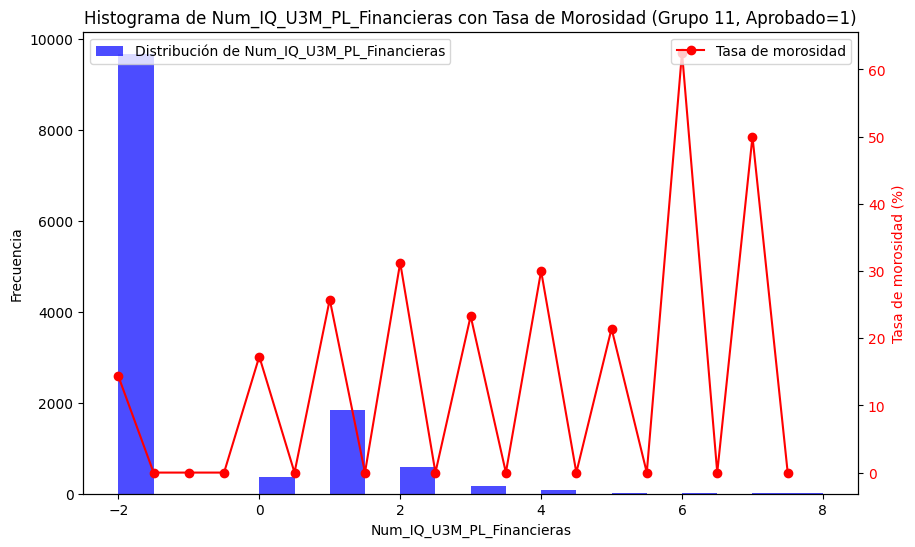

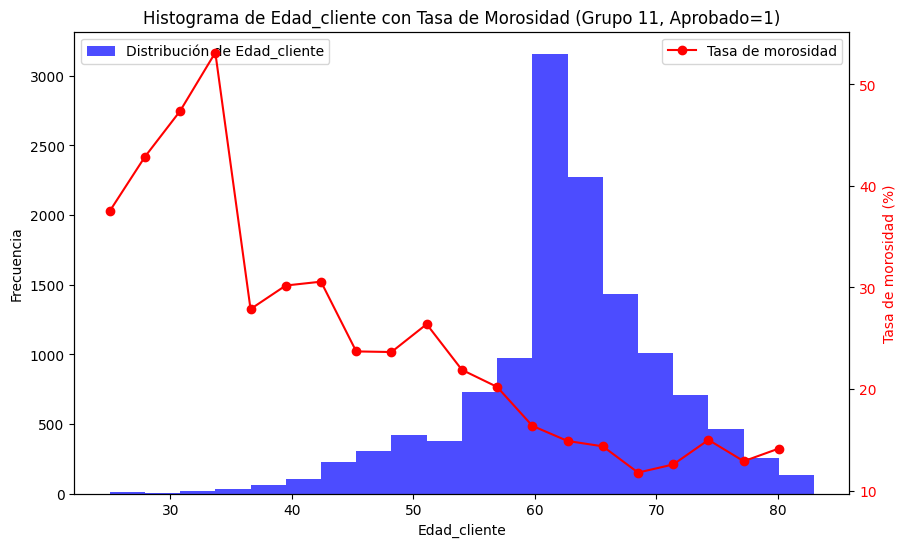

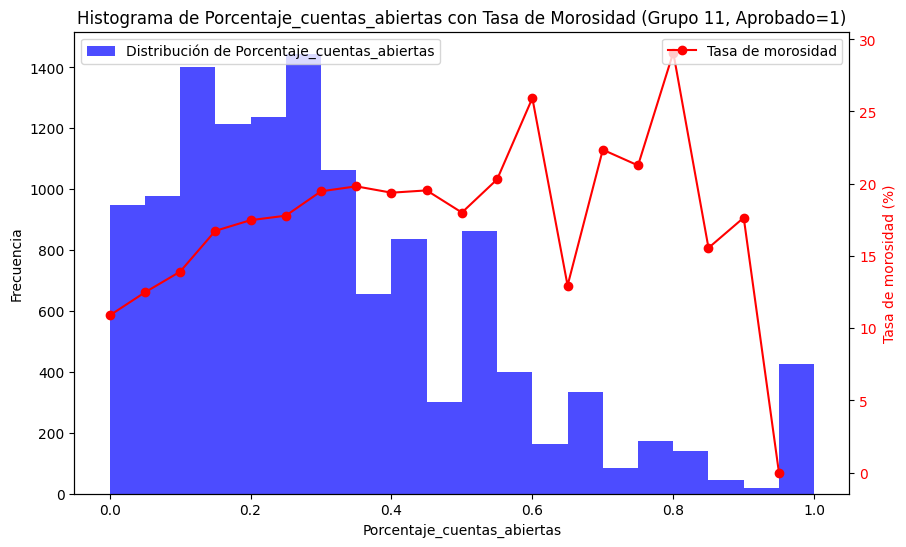

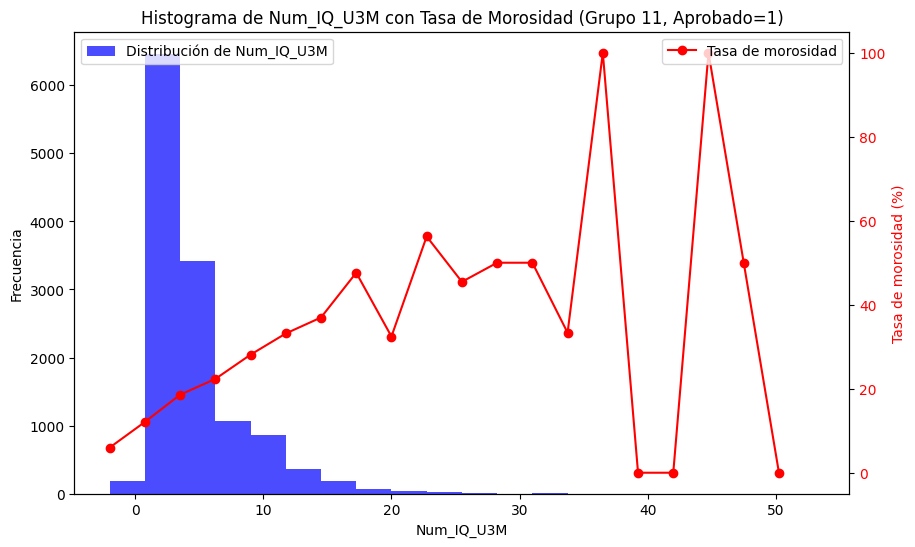

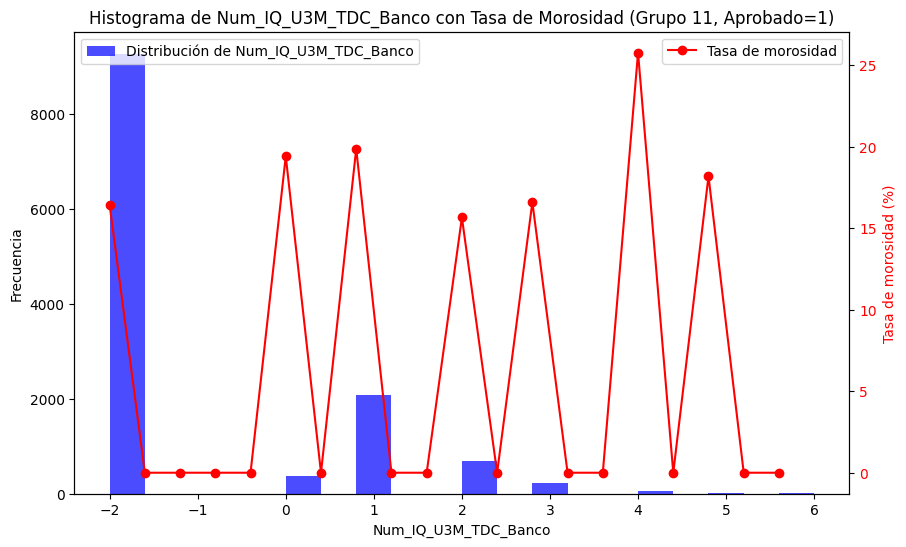

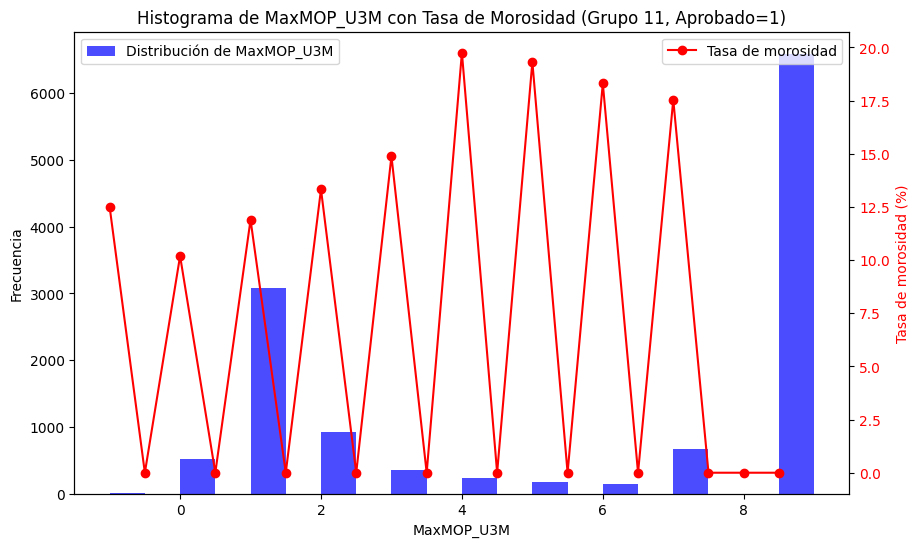

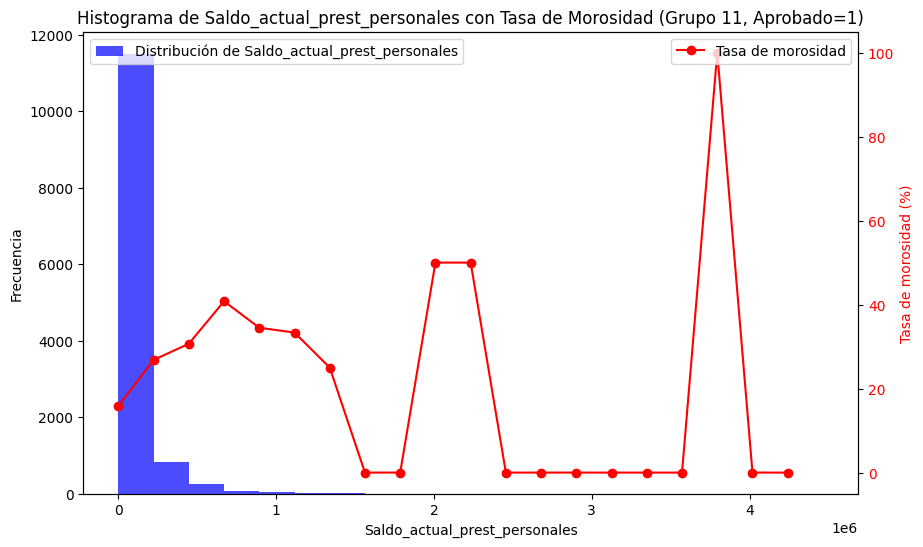

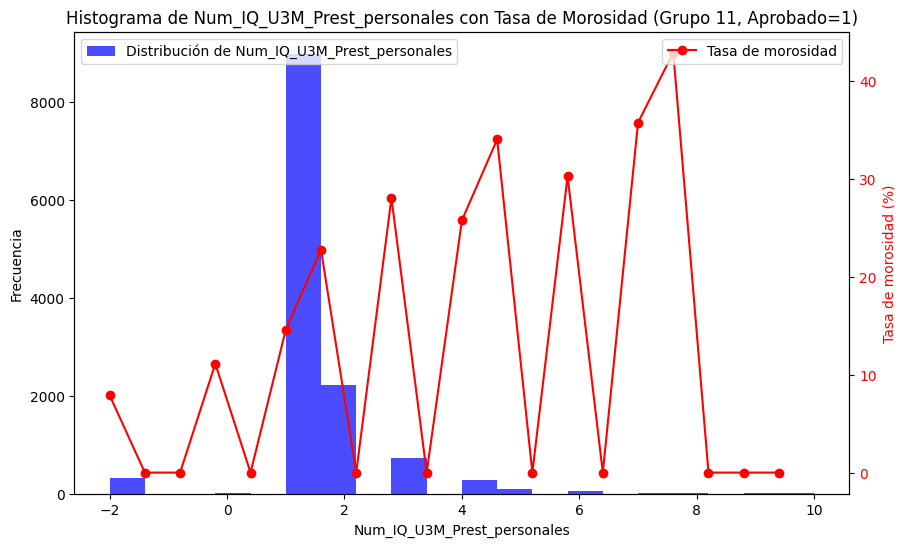

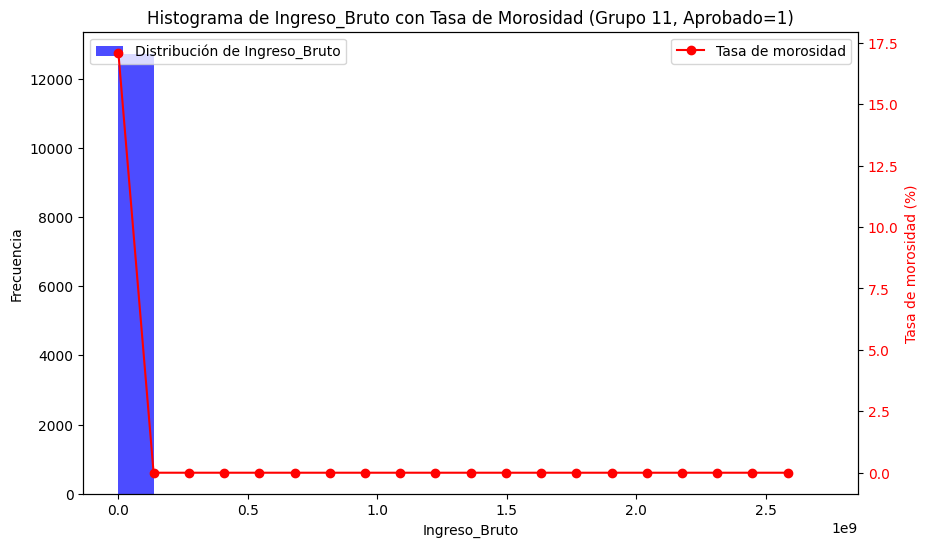

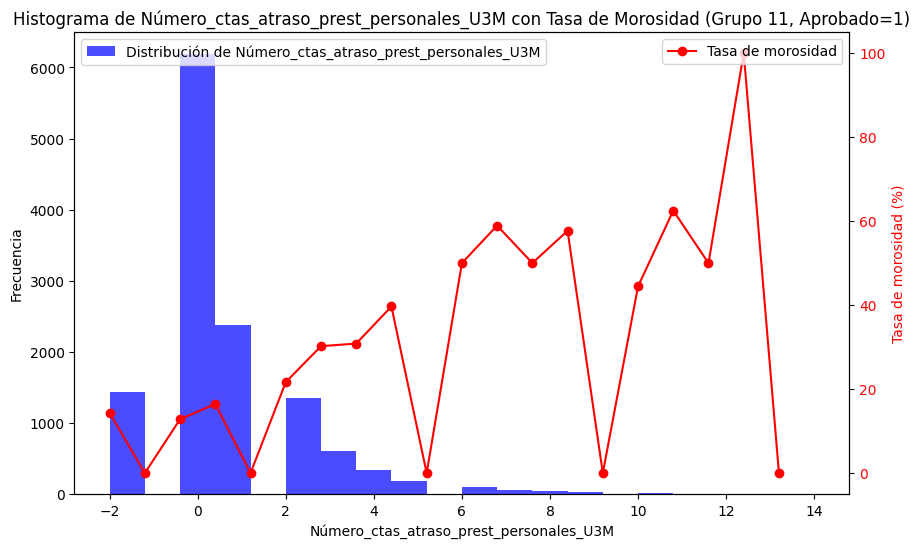

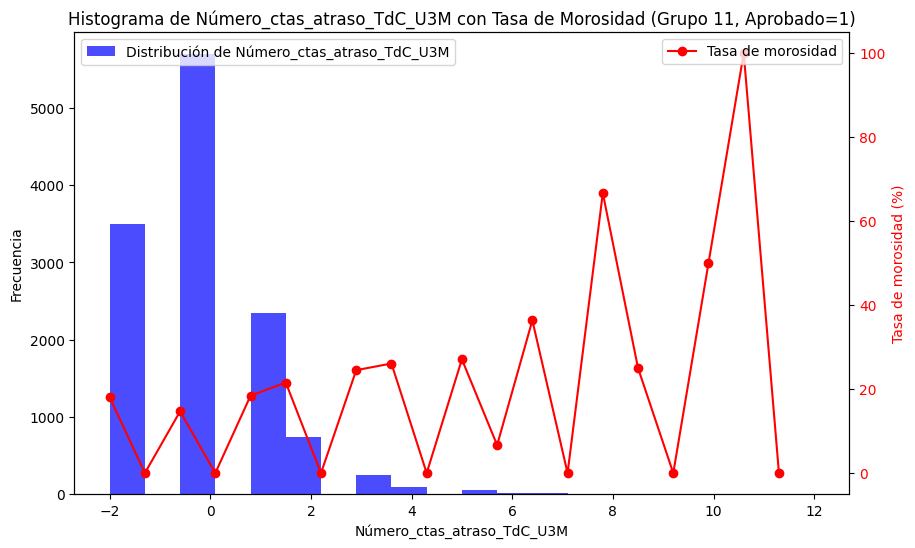

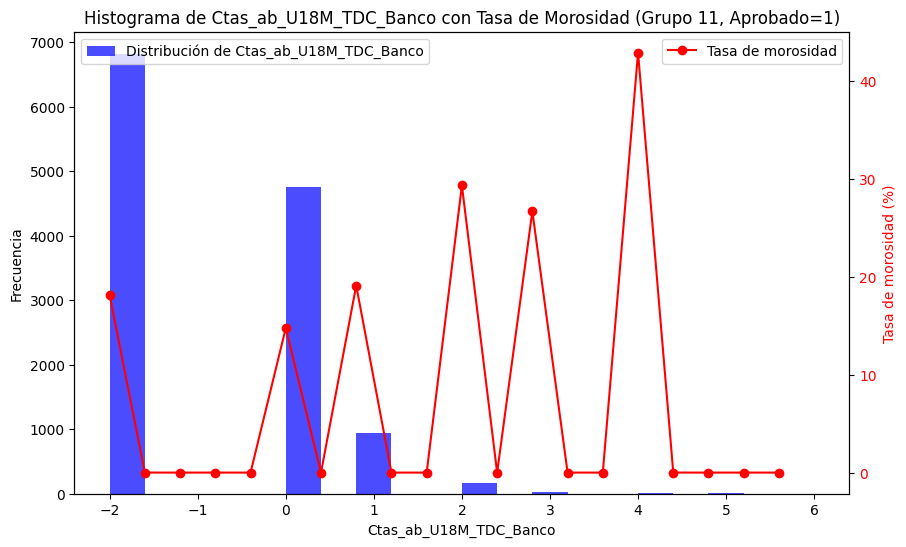

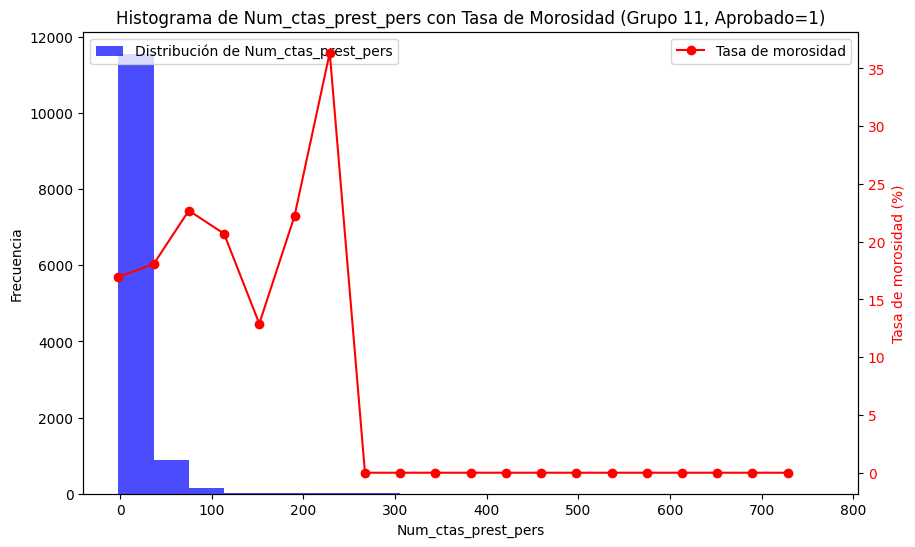

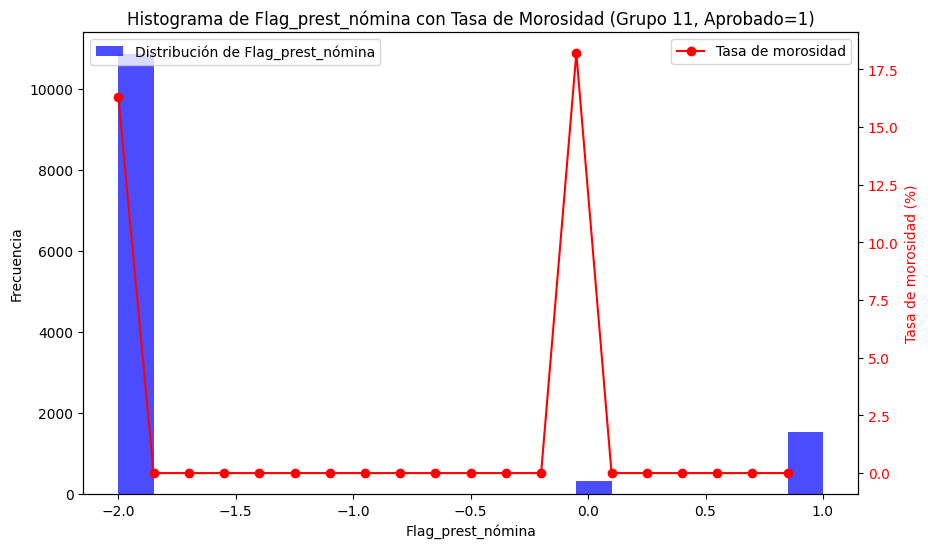

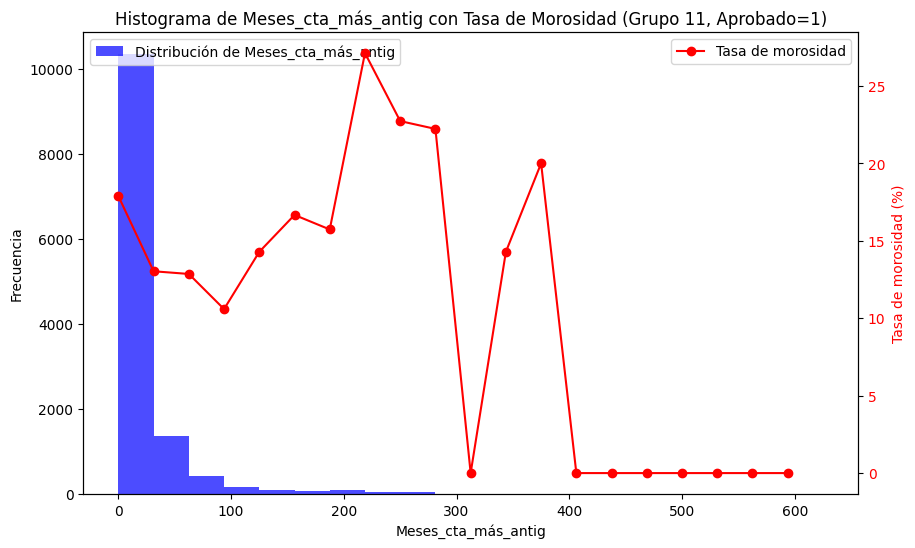

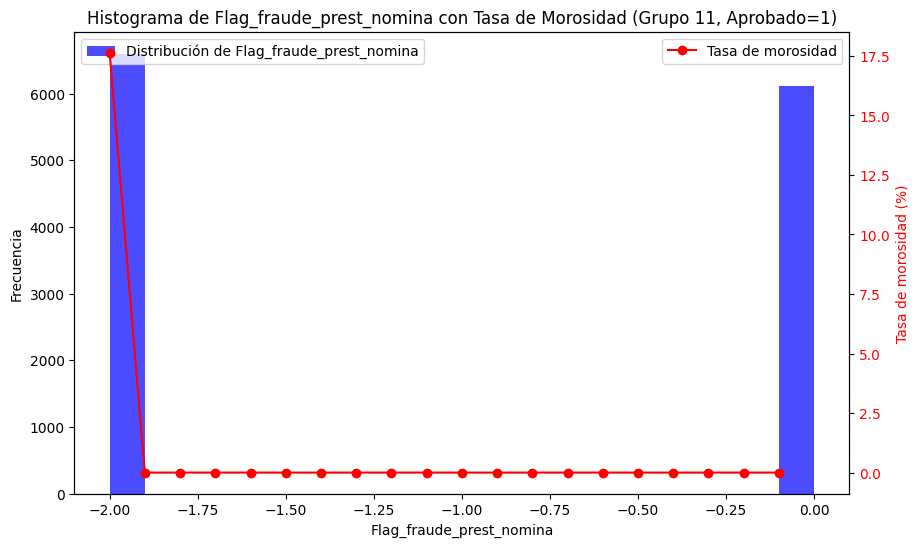

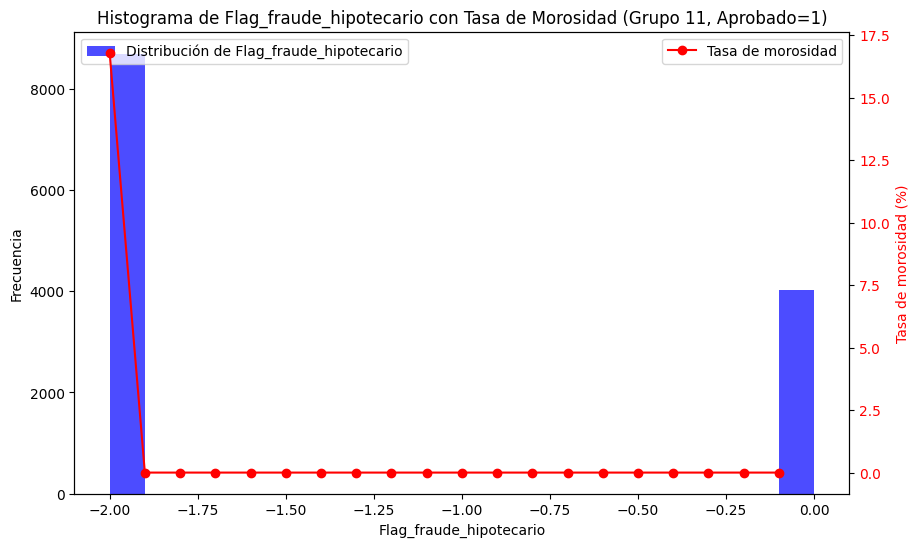

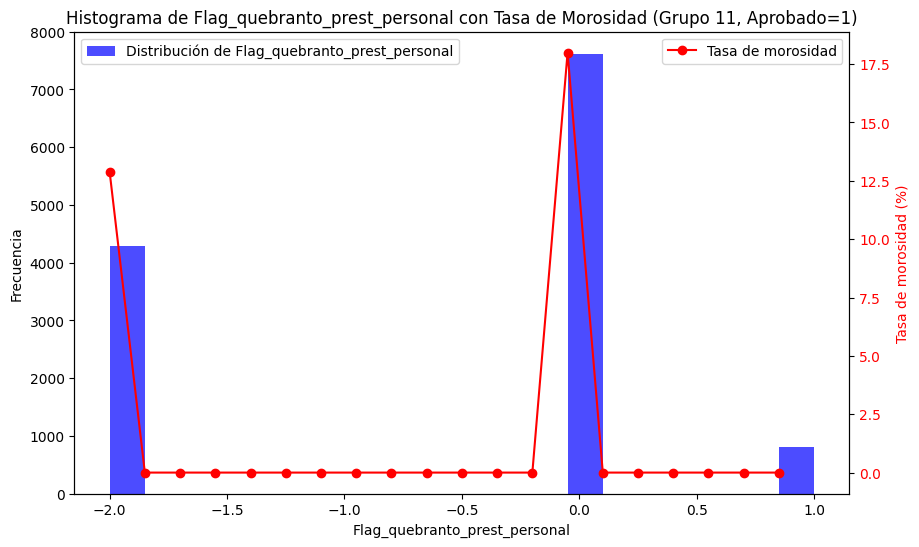

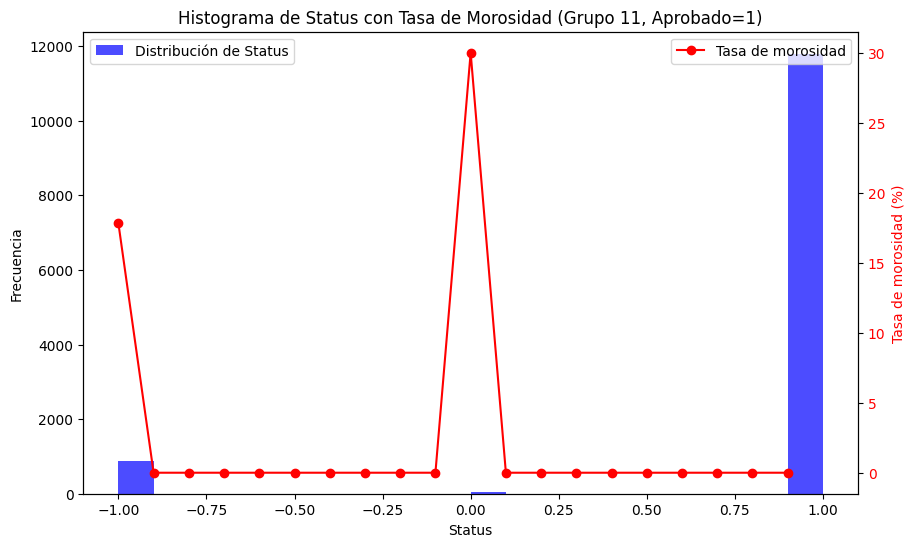

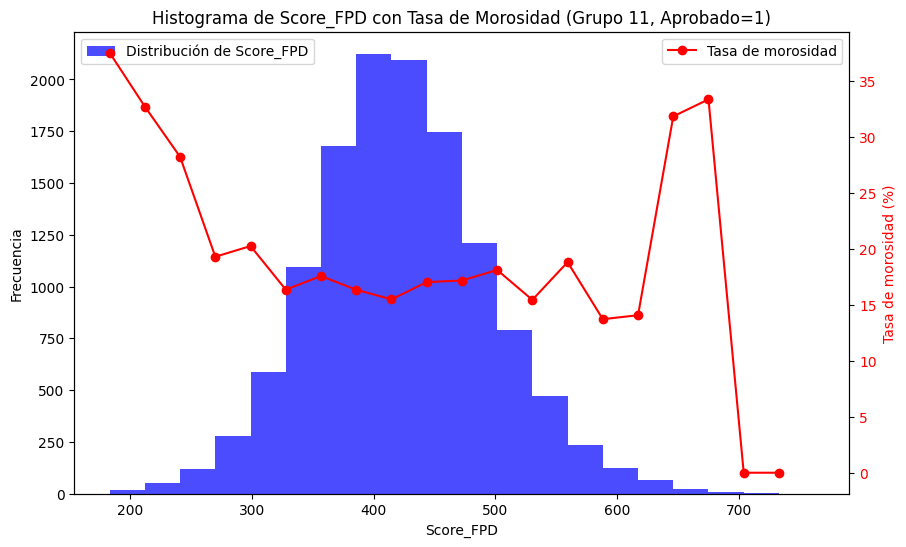

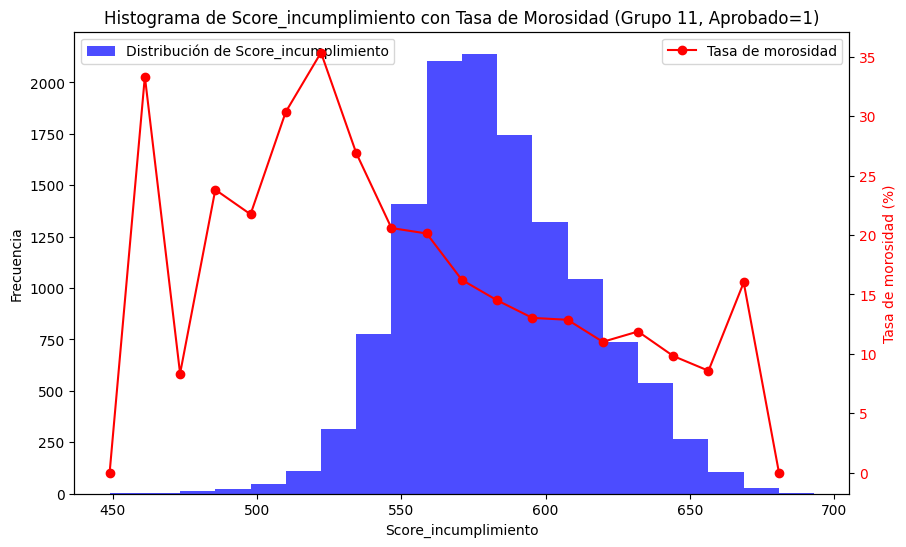

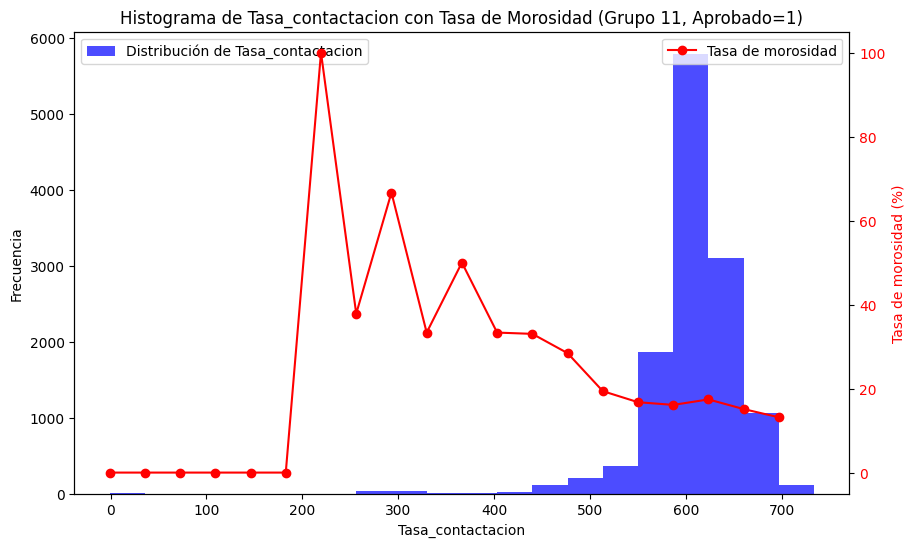

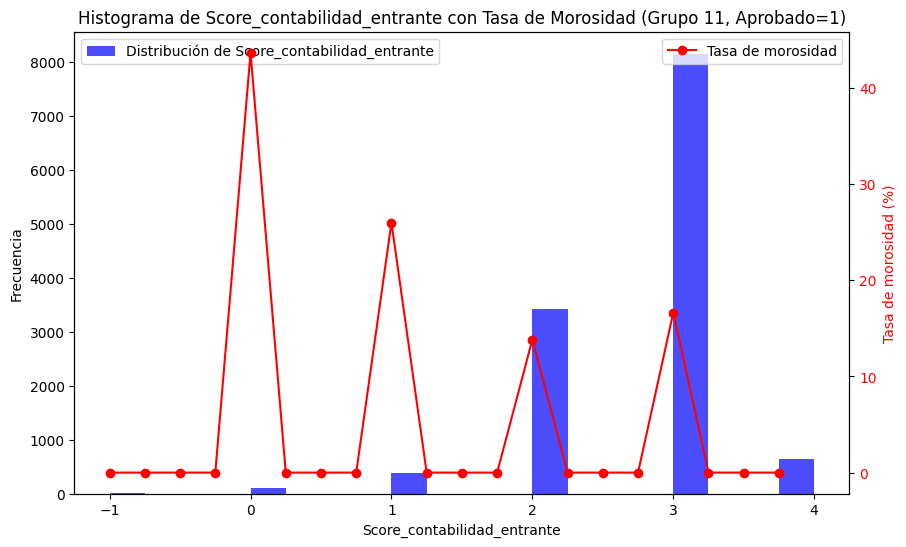

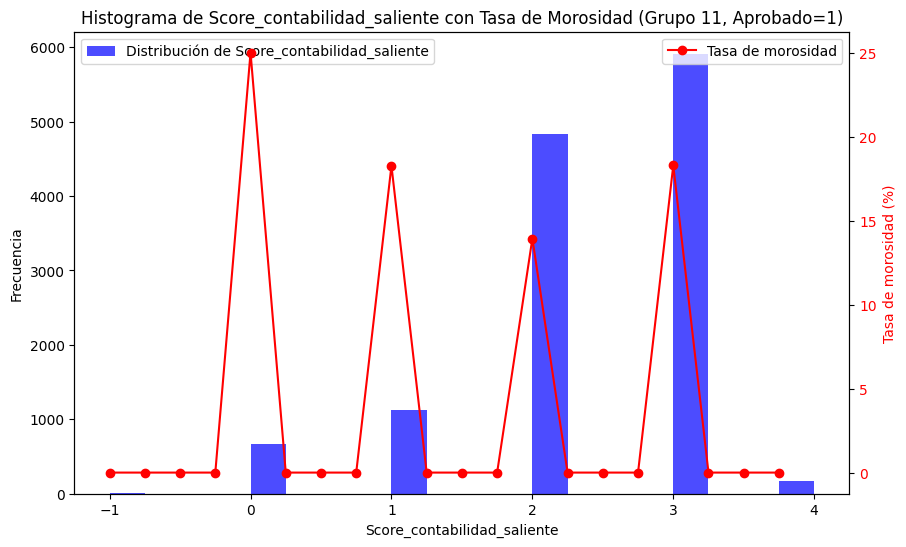

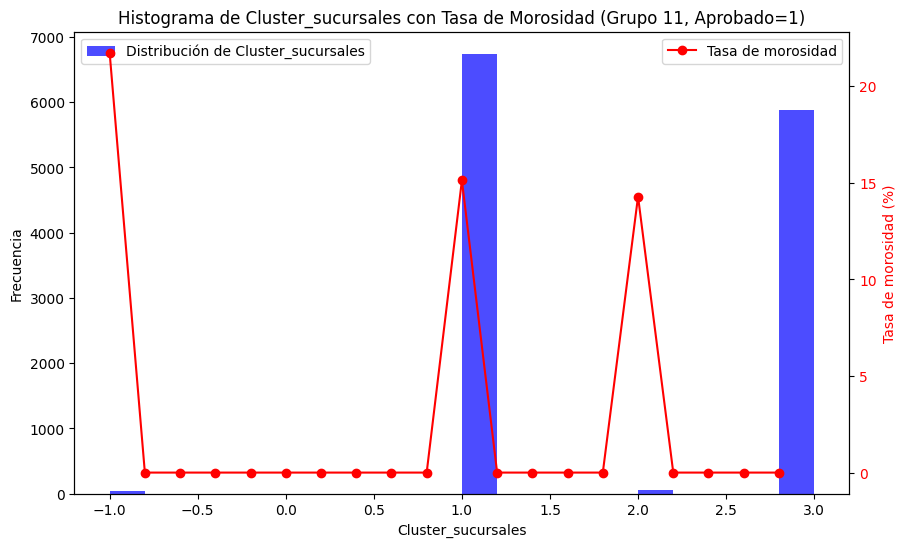

In [ ]:
# Importamos numpy para trabajar con histogramas y cálculos adicionales
import numpy as np
import matplotlib.pyplot as plt

# Excluimos las variables 'Aprobado', 'Hit_Buro_Huella' y 'Malo' antes de generar los histogramas
# Filtramos los datos para obtener el grupo "Grupo_11" cuando Aprobado = 1
df_grupo_11_aprobado = df[(df['Hit_Buro_Huella_agrupado'] == 'Grupo_11') & (df['Aprobado'] == 1)]

# Excluimos las columnas 'Aprobado', 'Hit_Buro_Huella' y 'Malo'
columns_to_exclude = ['Aprobado', 'Hit_Buro_Huella', 'Malo']
df_grupo_11_aprobado_filtered = df_grupo_11_aprobado.drop(columns=columns_to_exclude)

# Obtenemos solo las columnas numéricas para crear los histogramas
numeric_columns = df_grupo_11_aprobado_filtered.select_dtypes(include=['int64', 'float64']).columns

# Generamos histogramas y la gráfica de tasa de morosidad
for column in numeric_columns:
    # Configuramos el gráfico con dos ejes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Histograma para la variable numérica
    ax1.hist(df_grupo_11_aprobado_filtered[column], bins=20, color='blue', alpha=0.7, label=f'Distribución de {column}')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frecuencia')
    ax1.legend(loc='upper left')

    # Creamos un segundo eje para la tasa de morosidad
    ax2 = ax1.twinx()

    # Calculamos la tasa de morosidad para cada bin del histograma
    # Creamos los bins
    counts, bin_edges = np.histogram(df_grupo_11_aprobado_filtered[column], bins=20)

    # Inicializamos listas para contar morosos por cada bin
    morosidad_per_bin = []

    for i in range(len(bin_edges) - 1):
        # Filtramos los datos dentro del bin actual
        bin_data = df_grupo_11_aprobado[(df_grupo_11_aprobado[column] >= bin_edges[i]) & (df_grupo_11_aprobado[column] < bin_edges[i+1])]

        # Calculamos la tasa de morosidad en ese bin
        if len(bin_data) > 0:
            morosidad_per_bin.append(bin_data['Malo'].mean() * 100)
        else:
            morosidad_per_bin.append(0)

    # Graficamos la tasa de morosidad (en color rojo)
    ax2.plot(bin_edges[:-1], morosidad_per_bin, color='red', marker='o', label='Tasa de morosidad')
    ax2.set_ylabel('Tasa de morosidad (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.legend(loc='upper right')

    # Mostramos el gráfico
    plt.title(f'Histograma de {column} con Tasa de Morosidad (Grupo 11, Aprobado=1)')
    plt.show()

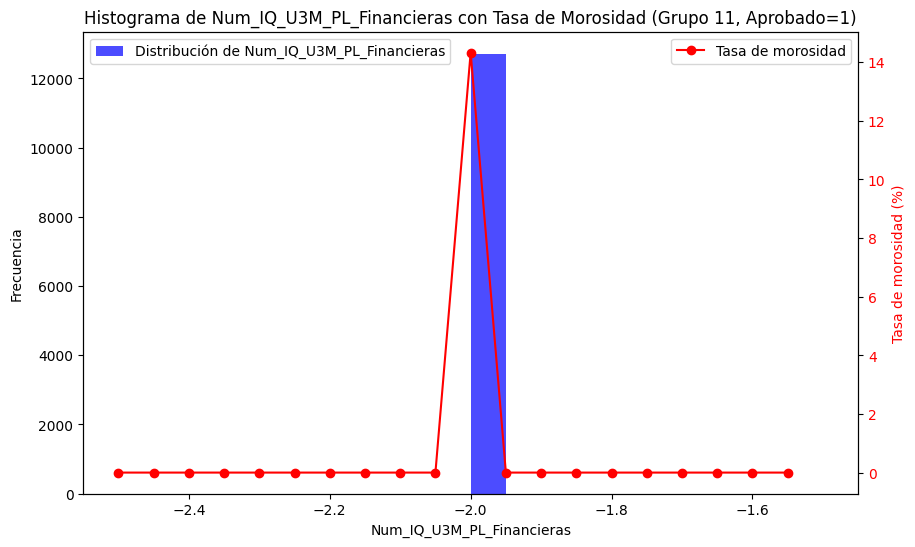

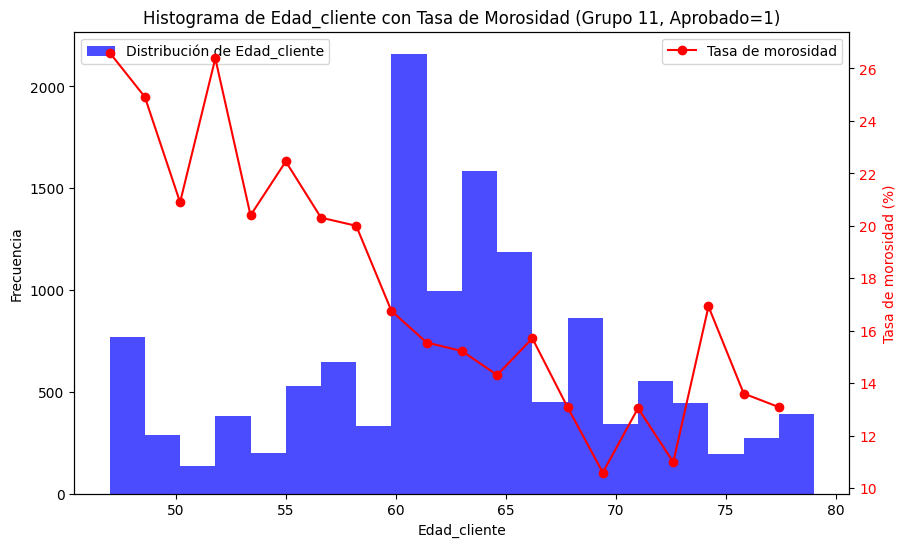

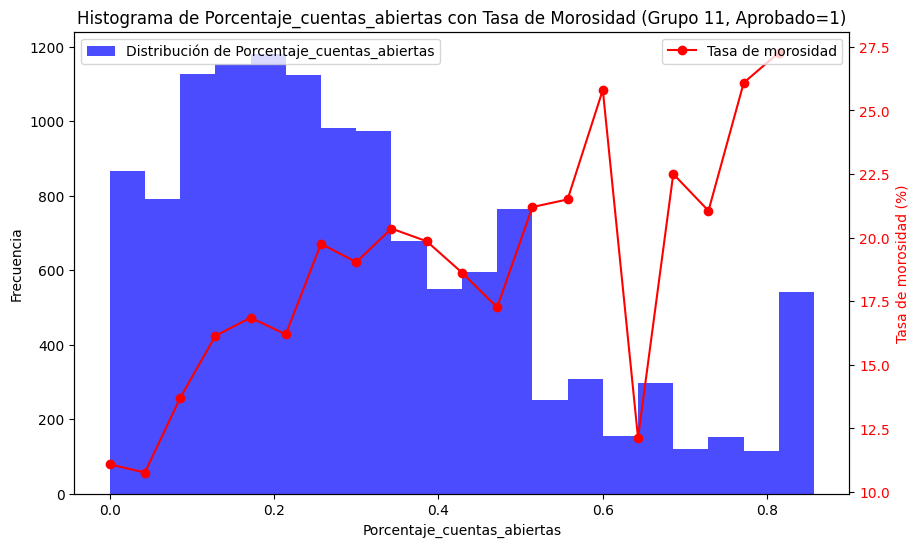

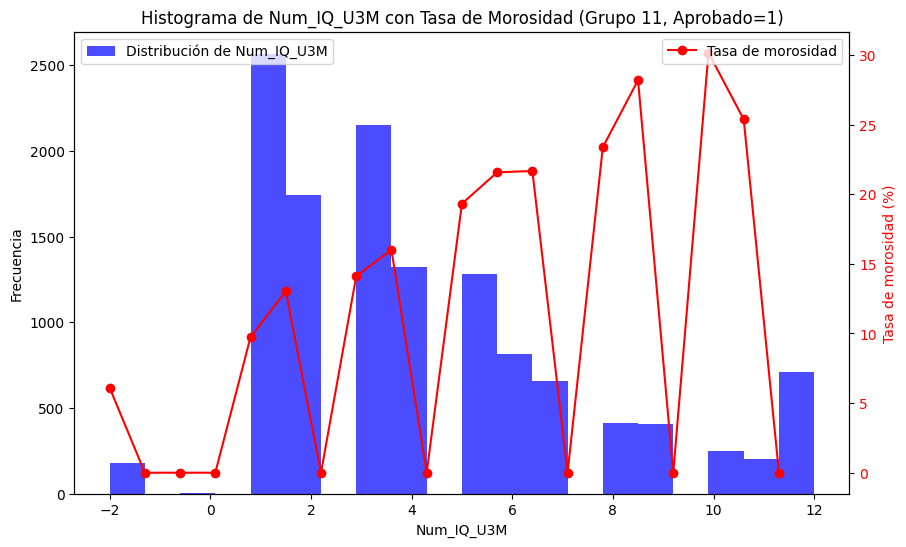

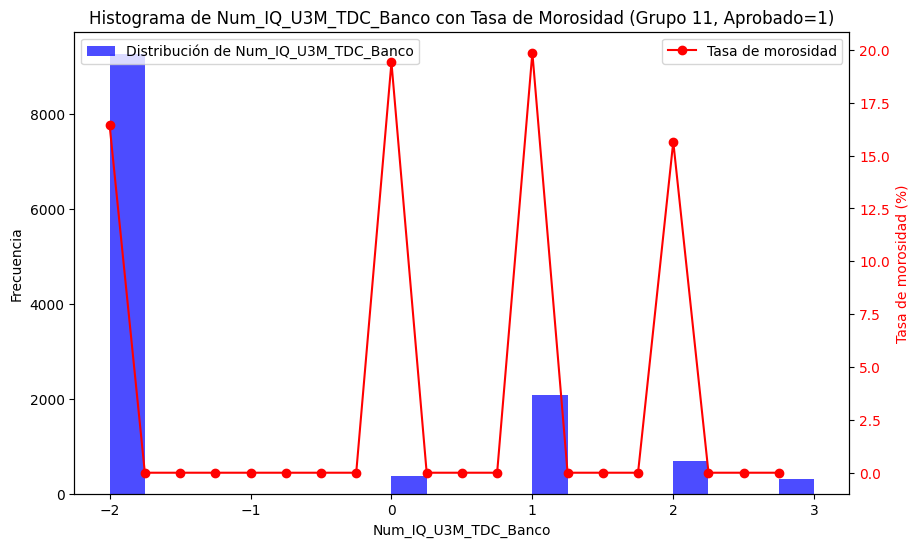

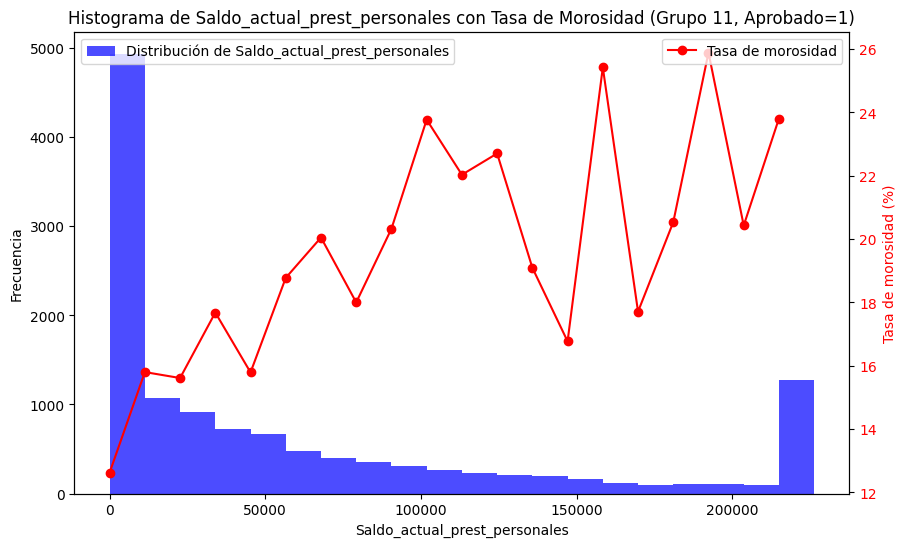

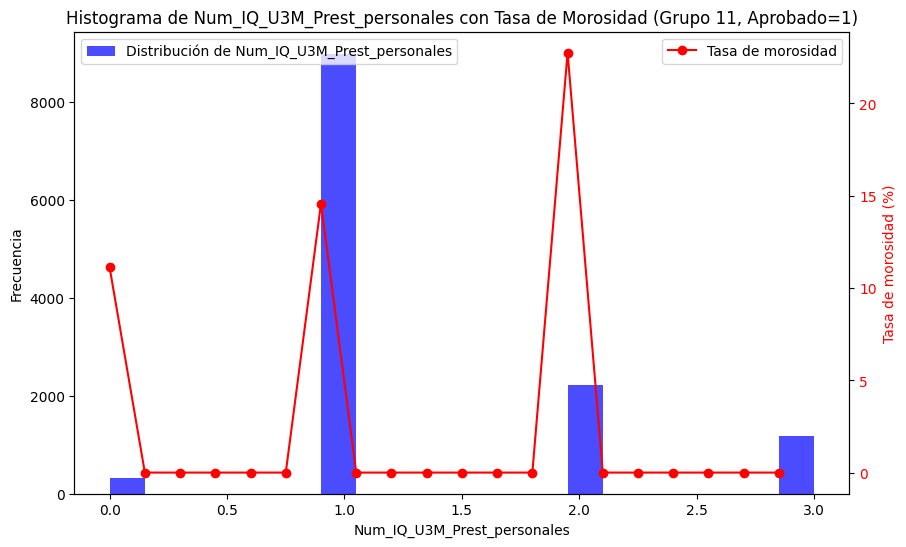

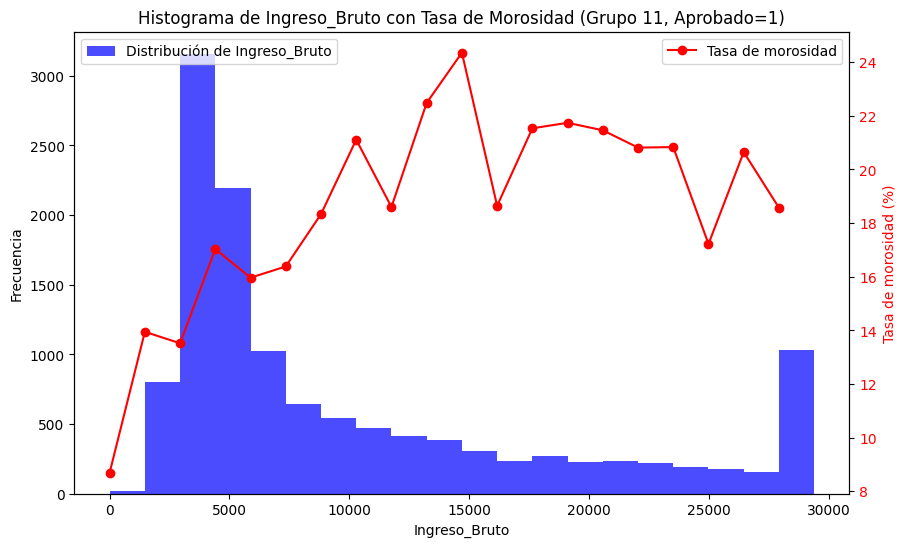

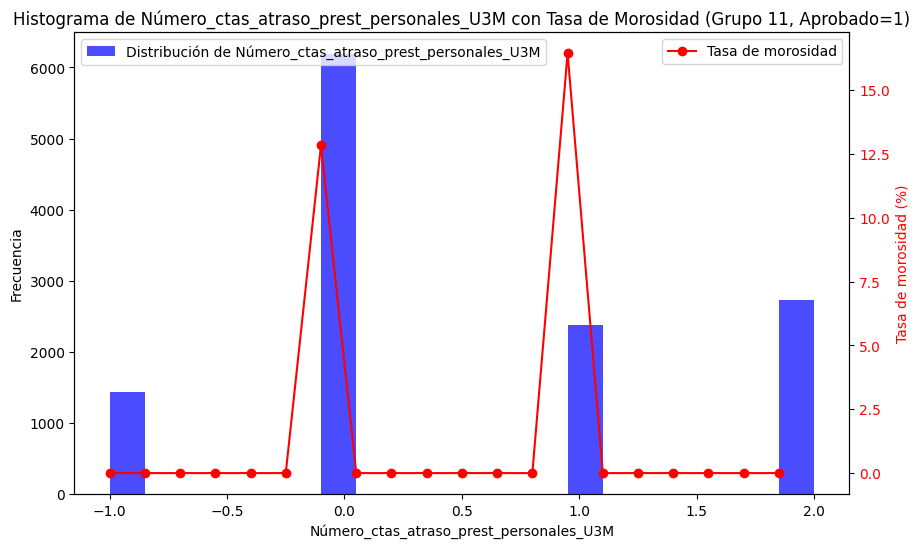

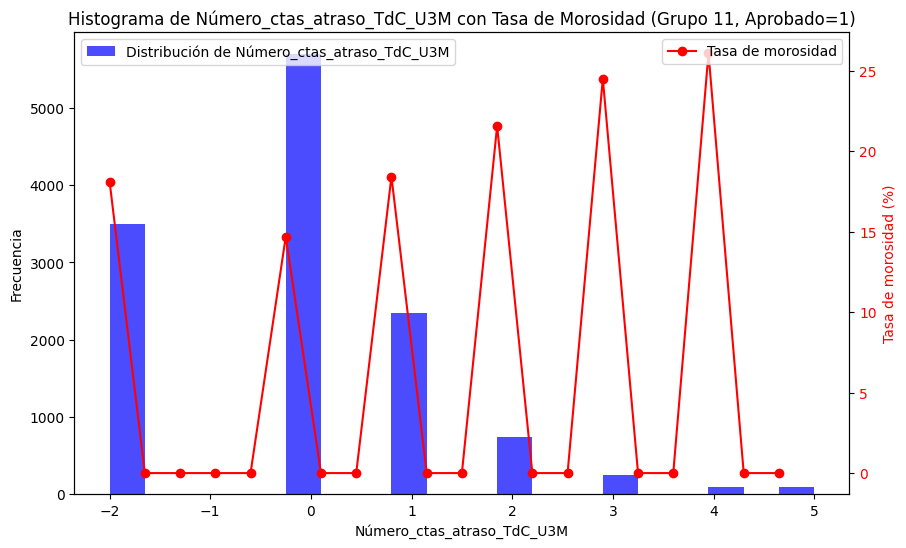

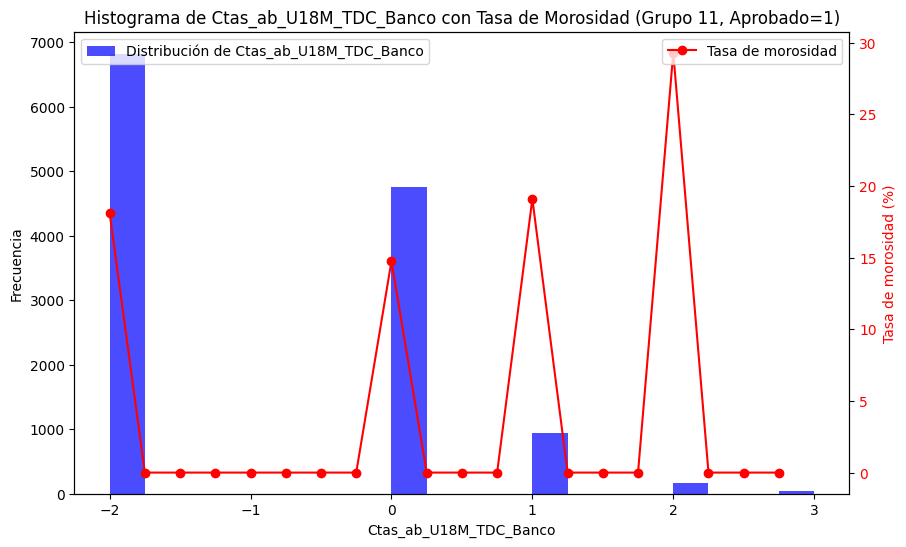

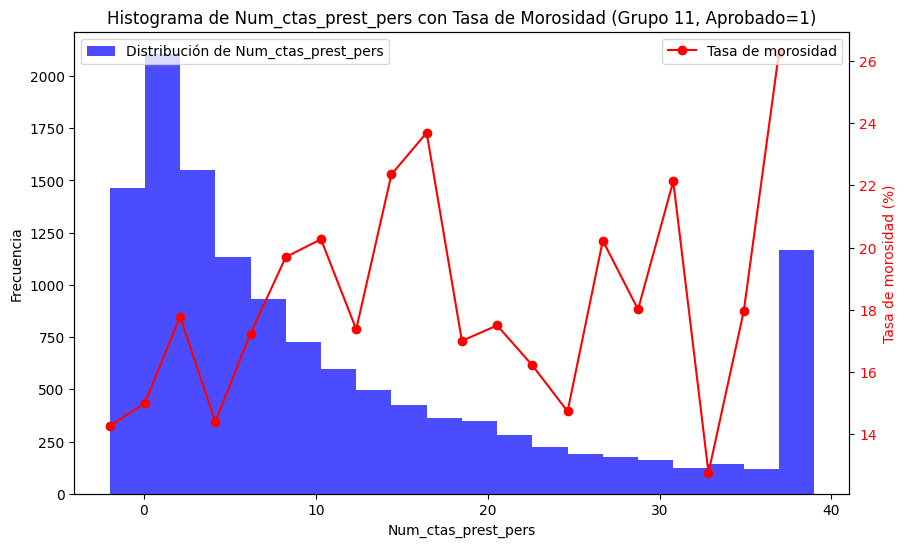

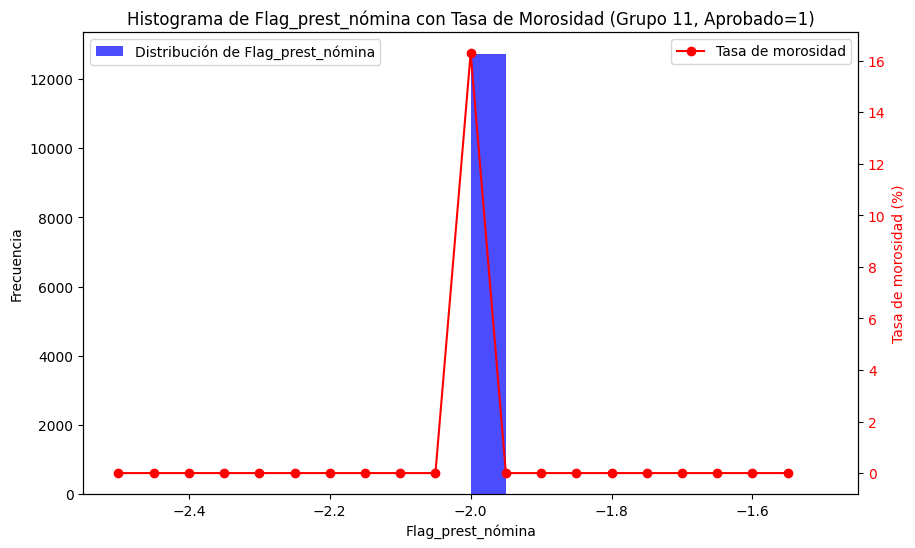

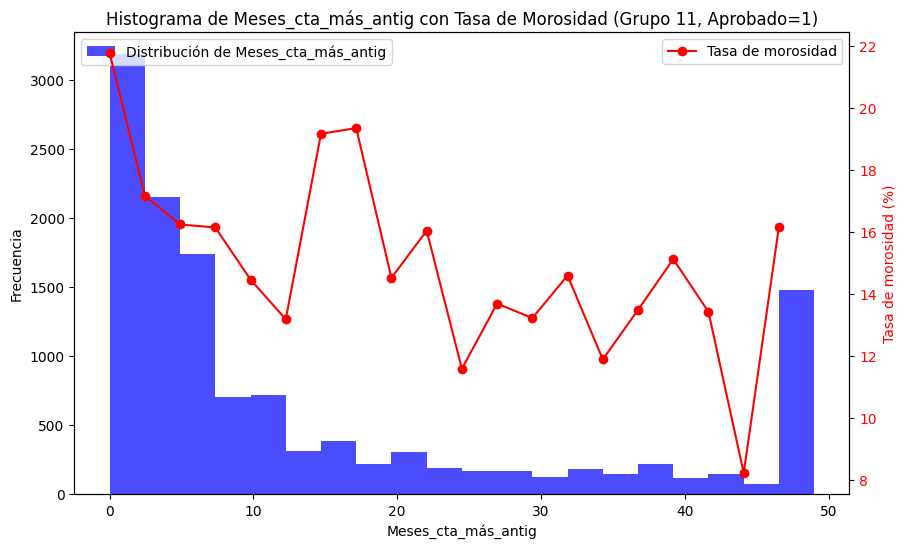

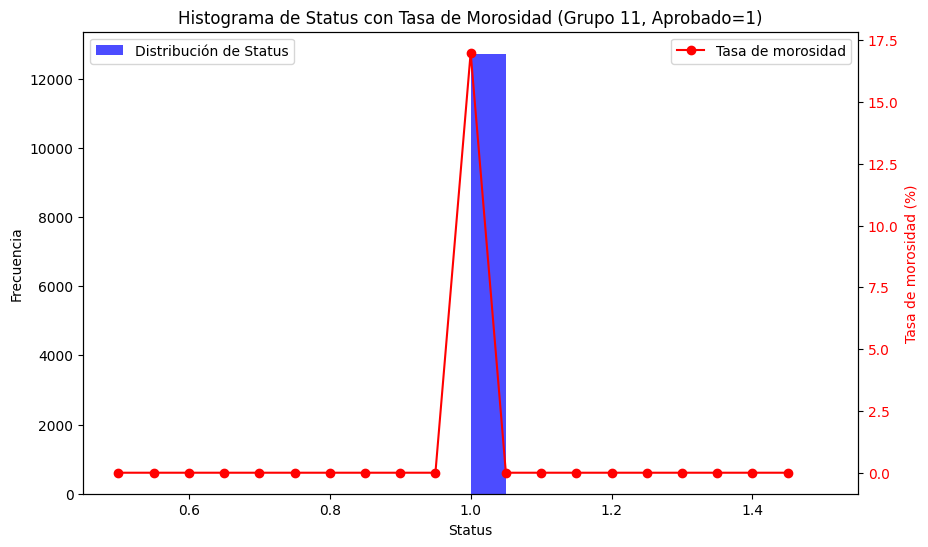

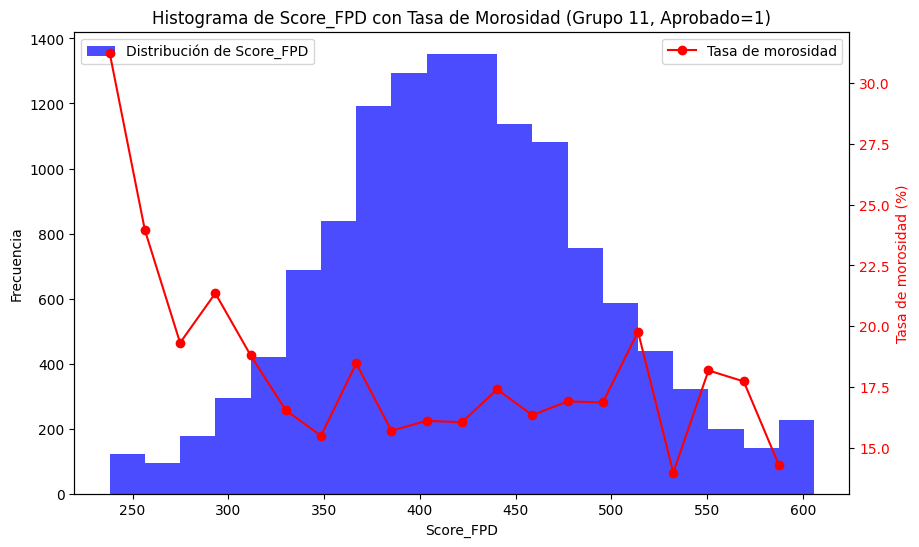

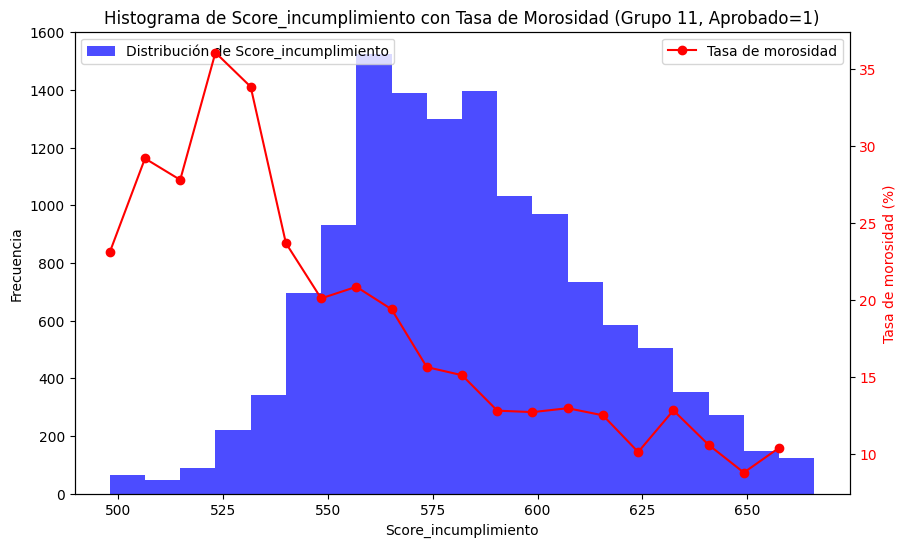

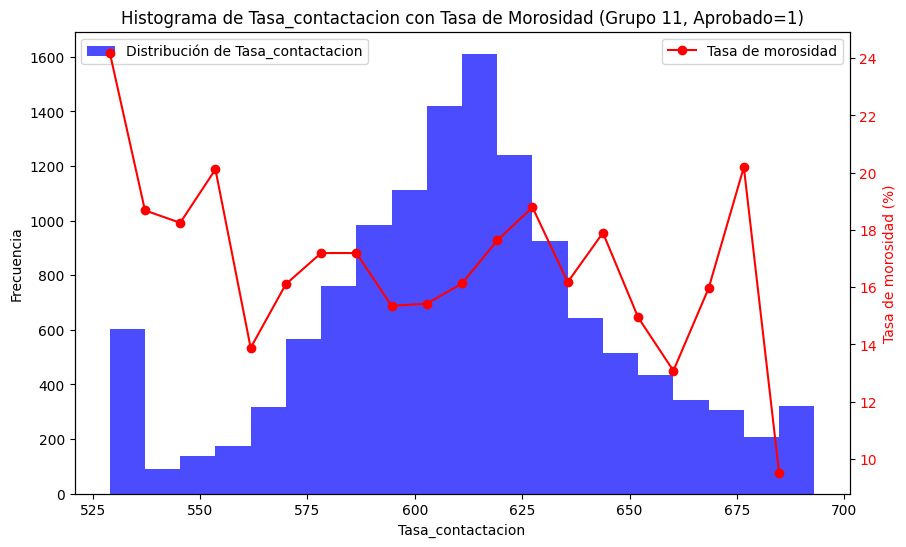

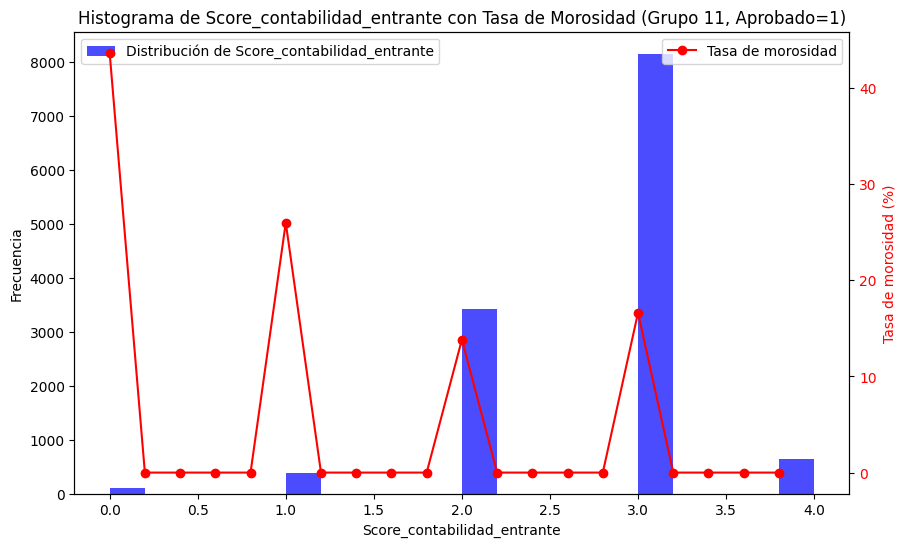

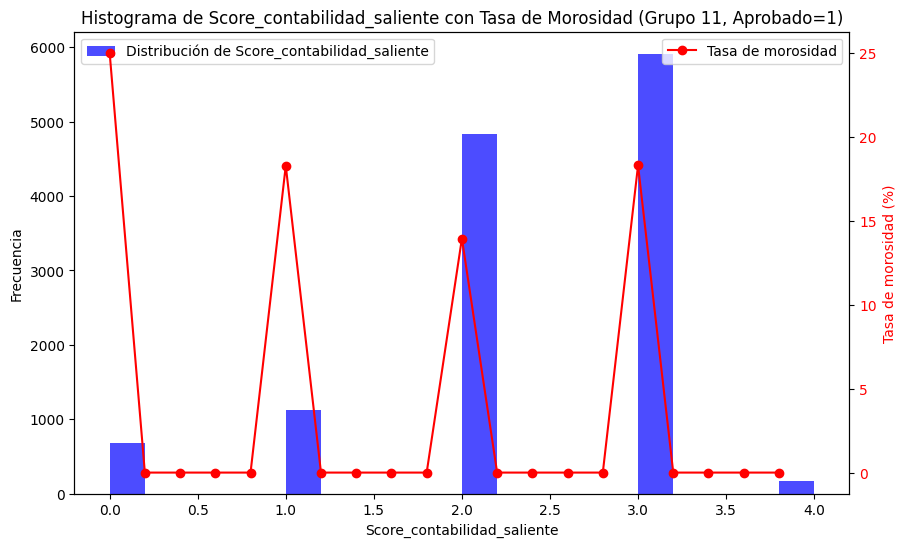

In [ ]:
# Función para detectar outliers usando el rango intercuartílico (IQR)
def detectar_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Obtenemos solo las columnas numéricas
numeric_columns = df_grupo_11_aprobado_filtered.select_dtypes(include=['int64', 'float64']).columns

# Diccionario para almacenar las columnas que tuvieron tratamiento de outliers
columns_with_outliers = {}

# Detectamos y corregimos outliers
for column in numeric_columns:
    # Detectamos los outliers en la columna
    outliers = detectar_outliers(df_grupo_11_aprobado_filtered, column)

    if outliers.any():
        # Reemplazamos los outliers con los límites superior e inferior
        Q1 = df_grupo_11_aprobado_filtered[column].quantile(0.25)
        Q3 = df_grupo_11_aprobado_filtered[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Si la columna es de tipo entero, convertimos los límites a enteros antes de asignarlos
        if df_grupo_11_aprobado_filtered[column].dtype == 'int64':
            lower_bound = int(lower_bound)
            upper_bound = int(upper_bound)

        # Aplicamos la corrección
        df_grupo_11_aprobado_filtered.loc[df_grupo_11_aprobado_filtered[column] < lower_bound, column] = lower_bound
        df_grupo_11_aprobado_filtered.loc[df_grupo_11_aprobado_filtered[column] > upper_bound, column] = upper_bound

        # Guardamos la columna que tuvo tratamiento
        columns_with_outliers[column] = (lower_bound, upper_bound)

# Ahora generamos histogramas y la gráfica de tasa de morosidad solo para las variables que tuvieron tratamiento
for column in columns_with_outliers:
    # Configuramos el gráfico con dos ejes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Histograma para la variable numérica
    ax1.hist(df_grupo_11_aprobado_filtered[column], bins=20, color='blue', alpha=0.7, label=f'Distribución de {column}')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frecuencia')
    ax1.legend(loc='upper left')

    # Creamos un segundo eje para la tasa de morosidad
    ax2 = ax1.twinx()

    # Calculamos la tasa de morosidad para cada bin del histograma
    counts, bin_edges = np.histogram(df_grupo_11_aprobado_filtered[column], bins=20)

    morosidad_per_bin = []
    for i in range(len(bin_edges) - 1):
        bin_data = df_grupo_11_aprobado[(df_grupo_11_aprobado[column] >= bin_edges[i]) & (df_grupo_11_aprobado[column] < bin_edges[i+1])]
        if len(bin_data) > 0:
            morosidad_per_bin.append(bin_data['Malo'].mean() * 100)
        else:
            morosidad_per_bin.append(0)

    # Graficamos la tasa de morosidad (en color rojo)
    ax2.plot(bin_edges[:-1], morosidad_per_bin, color='red', marker='o', label='Tasa de morosidad')
    ax2.set_ylabel('Tasa de morosidad (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.legend(loc='upper right')

    # Mostramos el gráfico
    plt.title(f'Histograma de {column} con Tasa de Morosidad (Grupo 11, Aprobado=1)')
    plt.show()


In [ ]:
# Agrupamos por 'Entidad_federativa' y calculamos la tasa de morosidad (promedio de la columna 'Malo')
tasa_morosidad_entidad = df_grupo_11_aprobado.groupby('Entidad_federativa')['Malo'].mean()

# Convertimos la tasa de morosidad a porcentaje
tasa_morosidad_entidad = (tasa_morosidad_entidad * 100).round(2)

# Calculamos el número de casos por cada entidad federativa
num_casos_entidad = df_grupo_11_aprobado.groupby('Entidad_federativa').size()

# Creamos un DataFrame con la tasa de morosidad y el número de casos
df_resumen_entidad = pd.DataFrame({
  'Tasa_morosidad (%)': tasa_morosidad_entidad,
  'Num_casos': num_casos_entidad
  }).reset_index()

# Ordenamos por la tasa de morosidad de mayor a menor
df_resumen_entidad = df_resumen_entidad.sort_values(by='Tasa_morosidad (%)', ascending=False)

print(df_resumen_entidad)

   Entidad_federativa  Tasa_morosidad (%)  Num_casos
28                TAB               37.10        124
4                 CDM               26.32         19
16                MIC               25.00          4
11                 EM               22.31        798
14                HGO               22.11         95
5                CDMX               20.78        616
3                 CAM               20.70        256
7                 CHS               20.69        290
32                VER               20.42        862
19                NAY               20.25        158
1                 BCN               19.65        397
15                JAL               18.40        538
10                DGO               17.81        292
22                PUE               17.76        411
31               TLAX               17.59        108
27                SON               17.32        820
2                 BCS               17.22        151
25                SIN               16.95     

In [ ]:
# Reemplazamos los valores según las reglas indicadas usando loc para evitar el SettingWithCopyWarning
df_grupo_11_aprobado.loc[:, 'Entidad_federativa'] = df_grupo_11_aprobado['Entidad_federativa'].replace({
  'CDM': 'CDMX',
  'CDMX': 'CDMX',
  'MIC': 'MICH',
  'MICH': 'MICH',
  'TLA': 'TLAX',
  'TLAX': 'TLAX'
  })

# Agrupamos por 'Entidad_federativa' y calculamos la tasa de morosidad (promedio de la columna 'Malo')
tasa_morosidad_entidad = df_grupo_11_aprobado.groupby('Entidad_federativa')['Malo'].mean()

# Convertimos la tasa de morosidad a porcentaje
tasa_morosidad_entidad = (tasa_morosidad_entidad * 100).round(2)

# Calculamos el número de casos por cada entidad federativa
num_casos_entidad = df_grupo_11_aprobado.groupby('Entidad_federativa').size()

# Creamos un DataFrame con la tasa de morosidad y el número de casos
df_resumen_entidad = pd.DataFrame({
    'Tasa_morosidad': tasa_morosidad_entidad,
    'Num_casos': num_casos_entidad
    }).reset_index()

# Ordenamos por la tasa de morosidad de mayor a menor
df_resumen_entidad = df_resumen_entidad.sort_values(by='Tasa_morosidad', ascending=False)

# Mostramos la tabla resultante
print(df_resumen_entidad)

   Entidad_federativa  Tasa_morosidad  Num_casos
26                TAB           37.10        124
10                 EM           22.31        798
13                HGO           22.11         95
4                CDMX           20.94        635
3                 CAM           20.70        256
6                 CHS           20.69        290
29                VER           20.42        862
17                NAY           20.25        158
1                 BCN           19.65        397
14                JAL           18.40        538
9                 DGO           17.81        292
20                PUE           17.76        411
25                SON           17.32        820
28               TLAX           17.27        110
2                 BCS           17.22        151
23                SIN           16.95        655
5                 CHI           16.77        960
7                 COA           16.31        895
16                MOR           15.87        189
31                ZA

<ipython-input-190-092801874bdd>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bines_agrupado = df_bines.groupby('Gpo_Ent_Fed').agg({


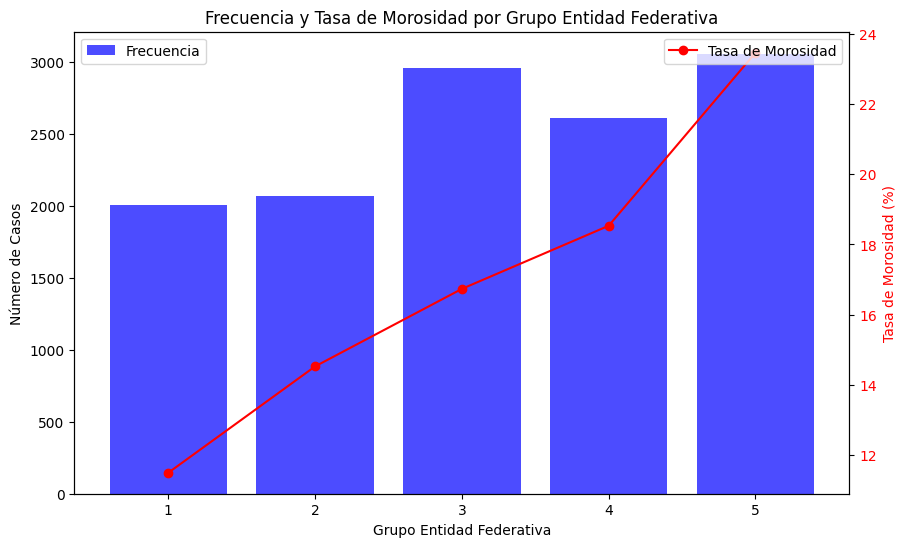

In [ ]:
# Calculamos la tasa de morosidad para cada entidad federativa
tasa_morosidad_entidad = df_grupo_11_aprobado.groupby('Entidad_federativa')['Malo'].mean()

# Ordenamos las entidades por tasa de morosidad de mayor a menor
tasa_morosidad_entidad_ordenada = tasa_morosidad_entidad.sort_values(ascending=False)

# Creamos los 5 bines de acuerdo a la tasa de morosidad ordenada
bines = pd.cut(tasa_morosidad_entidad_ordenada.rank(method='first'), bins=5, labels=[1, 2, 3, 4, 5])

# Creamos un DataFrame con los bines y la tasa de morosidad por entidad
df_bines = pd.DataFrame({
    'Entidad_federativa': tasa_morosidad_entidad_ordenada.index,
    'Tasa_morosidad': (tasa_morosidad_entidad_ordenada * 100).round(2),
    'Gpo_Ent_Fed': bines
    })

# Contamos el número de casos por cada entidad federativa
num_casos_entidad = df_grupo_11_aprobado.groupby('Entidad_federativa').size()

# Agregamos el número de casos al DataFrame
df_bines['Num_casos'] = num_casos_entidad

# Agrupamos por los bines (Gpo_Ent_Fed) para obtener la frecuencia total y la tasa de morosidad por bin
df_bines_agrupado = df_bines.groupby('Gpo_Ent_Fed').agg({
    'Num_casos': 'sum',
    'Tasa_morosidad': 'mean'
    }).reset_index()

# Generamos el gráfico de frecuencia con la tasa de morosidad en el eje secundario
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para la frecuencia
ax1.bar(df_bines_agrupado['Gpo_Ent_Fed'], df_bines_agrupado['Num_casos'], color='blue', alpha=0.7, label='Frecuencia')
ax1.set_xlabel('Grupo Entidad Federativa')
ax1.set_ylabel('Número de Casos')
ax1.legend(loc='upper left')

# Creamos un segundo eje para la tasa de morosidad
ax2 = ax1.twinx()
ax2.plot(df_bines_agrupado['Gpo_Ent_Fed'], df_bines_agrupado['Tasa_morosidad'], color='red', marker='o', label='Tasa de Morosidad')
ax2.set_ylabel('Tasa de Morosidad (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Mostramos el gráfico
plt.title('Frecuencia y Tasa de Morosidad por Grupo Entidad Federativa')
plt.xticks(rotation=0)
plt.show()

In [ ]:
def calculate_iv_ks(df, column, target):
    """
    Esta función calcula el Information Value (IV) y el Kolmogorov-Smirnov (KS) para una variable.
    """
    # Crear tabla de frecuencia para la columna y el target
    grouped = df.groupby(column, observed=True)[target].agg(['count', 'sum'])

    # Calcular el número de buenos y malos
    grouped['bad'] = grouped['sum']
    grouped['good'] = grouped['count'] - grouped['bad']

    # Calcular distribución porcentual de buenos y malos
    grouped['dist_bad'] = grouped['bad'] / grouped['bad'].sum()
    grouped['dist_good'] = grouped['good'] / grouped['good'].sum()

    # Calcular el IV
    grouped['iv'] = (grouped['dist_good'] - grouped['dist_bad']) * np.log(((grouped['dist_good']+0.0001) / (grouped['dist_bad']+0.0001)).replace([np.inf, -np.inf], 0))
    iv_value = grouped['iv'].sum()

    # Calcular el KS
    grouped['cum_bad'] = grouped['dist_bad'].cumsum()
    grouped['cum_good'] = grouped['dist_good'].cumsum()
    grouped['ks'] = abs(grouped['cum_good'] - grouped['cum_bad'])
    ks_value = grouped['ks'].max()

    # Devolver la tabla con los valores y el IV y KS
    return grouped[['count', 'bad', 'good', 'dist_good', 'dist_bad', 'cum_good', 'cum_bad', 'ks']], iv_value, ks_value

# Filtrar el DataFrame para grupo_11_aprobado
df_grupo_11_aprobado = df[(df['Hit_Buro_Huella_agrupado'] == 'Grupo_11') & (df['Aprobado'] == 1)].copy()

# Variables excluidas
excluded_vars = ['Entidad_federativa', 'Tipo_suscripcion', 'Malo', 'Aprobado']
variables_to_process = [var for var in df_grupo_11_aprobado.columns if var not in excluded_vars]

# Lista para almacenar los resultados por variable
summary_results = []
detailed_results = {}
bins_results = {}

# Procesar todas las variables numéricas y categóricas
for var in variables_to_process:
    if pd.api.types.is_numeric_dtype(df_grupo_11_aprobado[var]):
        # Tratamiento para variables numéricas (bines de 20% de información)
        df_grupo_11_aprobado.loc[:, f'{var}_bin'] = pd.qcut(df_grupo_11_aprobado[var], q=5, duplicates='drop')
    else:
        # Tratamiento para variables categóricas
        df_grupo_11_aprobado[f'{var}_numeric'], _ = pd.factorize(df_grupo_11_aprobado[var])
        # Valores negativos (<= 0) se colocan en un bin separado
        df_grupo_11_aprobado.loc[:, f'{var}_bin'] = np.where(df_grupo_11_aprobado[f'{var}_numeric'] <= 0, '<=0', np.nan)
        # Binning para valores positivos
        if df_grupo_11_aprobado[f'{var}_numeric'].gt(0).any():
            df_grupo_11_aprobado.loc[df_grupo_11_aprobado[f'{var}_numeric'] > 0, f'{var}_bin'] = pd.qcut(
                df_grupo_11_aprobado.loc[df_grupo_11_aprobado[f'{var}_numeric'] > 0, f'{var}_numeric'], q=5, duplicates='drop')

    # Guardar los bines generados
    bins_results[var] = df_grupo_11_aprobado[[var, f'{var}_bin']].drop_duplicates()

    # Calcular IV y KS para la variable
    iv_ks_table, iv_value, ks_value = calculate_iv_ks(df_grupo_11_aprobado, f'{var}_bin', 'Malo')

    # Calcular % de buenos, % de malos, tasa de morosidad, % de población, % acumulado de buenos y malos
    iv_ks_table['tasa_morosidad'] = iv_ks_table['bad'] / iv_ks_table['count']
    iv_ks_table['percent_population'] = iv_ks_table['count'] / iv_ks_table['count'].sum()
    iv_ks_table['cum_good'] = iv_ks_table['dist_good'].cumsum()
    iv_ks_table['cum_bad'] = iv_ks_table['dist_bad'].cumsum()

    # Agregar la información al resumen
    summary_results.append({
        'Variable': var,
        'IV': iv_value,
        'KS': ks_value
    })

    # Guardar los detalles para cada variable
    detailed_results[var] = iv_ks_table

# Tratamiento especial para Entidad_federativa (usamos los bines de Gpo_Ent_Fed)
df_grupo_11_aprobado['Entidad_federativa_bin'] = df_grupo_11_aprobado['Entidad_federativa']

# Calcular IV y KS para 'Entidad_federativa'
iv_ks_table_ef, iv_value_ef, ks_value_ef = calculate_iv_ks(df_grupo_11_aprobado, 'Entidad_federativa_bin', 'Malo')
summary_results.append({
    'Variable': 'Entidad_federativa',
    'IV': iv_value_ef,
    'KS': ks_value_ef
})
detailed_results['Entidad_federativa'] = iv_ks_table_ef

# Tratamiento especial para Tipo_suscripcion (cada valor es un bin)
df_grupo_11_aprobado['Tipo_suscripcion_bin'] = df_grupo_11_aprobado['Tipo_suscripcion']

# Calcular IV y KS para 'Tipo_suscripcion'
iv_ks_table_ts, iv_value_ts, ks_value_ts = calculate_iv_ks(df_grupo_11_aprobado, 'Tipo_suscripcion_bin', 'Malo')
summary_results.append({
    'Variable': 'Tipo_suscripcion',
    'IV': iv_value_ts,
    'KS': ks_value_ts
})
detailed_results['Tipo_suscripcion'] = iv_ks_table_ts

# Convertir a DataFrame para mostrar el resumen
df_summary = pd.DataFrame(summary_results)

# Mostrar la tabla resumen
print("\nResumen Completo IV y KS")
print(df_summary)

# Imprimir los detalles de cada variable
for var, details in detailed_results.items():
    print(f"\nDetalles para la variable: {var}")
    print(details)



Resumen Completo IV y KS
                                   Variable        IV        KS
0                           Hit_Buro_Huella  0.000000       NaN
1                 Num_IQ_U3M_PL_Financieras  0.047092  0.060112
2                              Edad_cliente  0.084384  0.118362
3               Porcentaje_cuentas_abiertas  0.044542  0.085598
4                                Num_IQ_U3M  0.220350  0.198966
5                      Num_IQ_U3M_TDC_Banco  0.000104  0.002733
6                                MaxMOP_U3M  0.078613  0.129310
7             Saldo_actual_prest_personales  0.097619  0.135004
8               Num_IQ_U3M_Prest_personales  0.101337  0.142411
9                             Ingreso_Bruto  0.044728  0.086680
10  Número_ctas_atraso_prest_personales_U3M  0.204793  0.176747
11               Número_ctas_atraso_TdC_U3M  0.021008  0.056672
12                   Ctas_ab_U18M_TDC_Banco  0.006426  0.023748
13                      Num_ctas_prest_pers  0.019253  0.047184
14            

In [ ]:
# Vamos a crear una tabla resumen que incluya IV, pred_IV, KS y pred_KS para cada variable
# Lista para almacenar el resumen extendido por variable
summary_results_extended = []

# Procesar las etiquetas predictivas del IV y KS
for result in summary_results:
    # Determinar la etiqueta para IV
    if result['IV'] <= 0.02:
        pred_IV = "nula"
    elif 0.02 < result['IV'] <= 0.1:
        pred_IV = "baja"
    elif 0.1 < result['IV'] <= 0.3:
        pred_IV = "moderada"
    else:
        pred_IV = "fuerte"

    # Determinar la etiqueta para KS
    if result['KS'] <= 0.2:
        pred_KS = "pobre"
    elif 0.2 < result['KS'] <= 0.3:
        pred_KS = "aceptable"
    elif 0.3 < result['KS'] <= 0.4:
        pred_KS = "buena"
    else:
        pred_KS = "muy buena"

    # Agregar la información extendida al resumen
    summary_results_extended.append({
        'Variable': result['Variable'],
        'IV': result['IV'],
        'Pred_IV': pred_IV,
        'KS': result['KS'],
        'Pred_KS': pred_KS
    })

# Convertir el resumen extendido a DataFrame para mostrarlo
df_summary_extended = pd.DataFrame(summary_results_extended)

# Mostrar la tabla resumen con predicciones
print("\nTabla Resumen con IV, KS y predicciones:")
print(df_summary_extended)


Tabla Resumen con IV, KS y predicciones:
                                   Variable        IV   Pred_IV        KS  \
0                           Hit_Buro_Huella  0.000000      nula       NaN   
1                 Num_IQ_U3M_PL_Financieras  0.047092      baja  0.060112   
2                              Edad_cliente  0.084384      baja  0.118362   
3               Porcentaje_cuentas_abiertas  0.044542      baja  0.085598   
4                                Num_IQ_U3M  0.220350  moderada  0.198966   
5                      Num_IQ_U3M_TDC_Banco  0.000104      nula  0.002733   
6                                MaxMOP_U3M  0.078613      baja  0.129310   
7             Saldo_actual_prest_personales  0.097619      baja  0.135004   
8               Num_IQ_U3M_Prest_personales  0.101337  moderada  0.142411   
9                             Ingreso_Bruto  0.044728      baja  0.086680   
10  Número_ctas_atraso_prest_personales_U3M  0.204793  moderada  0.176747   
11               Número_ctas_atras

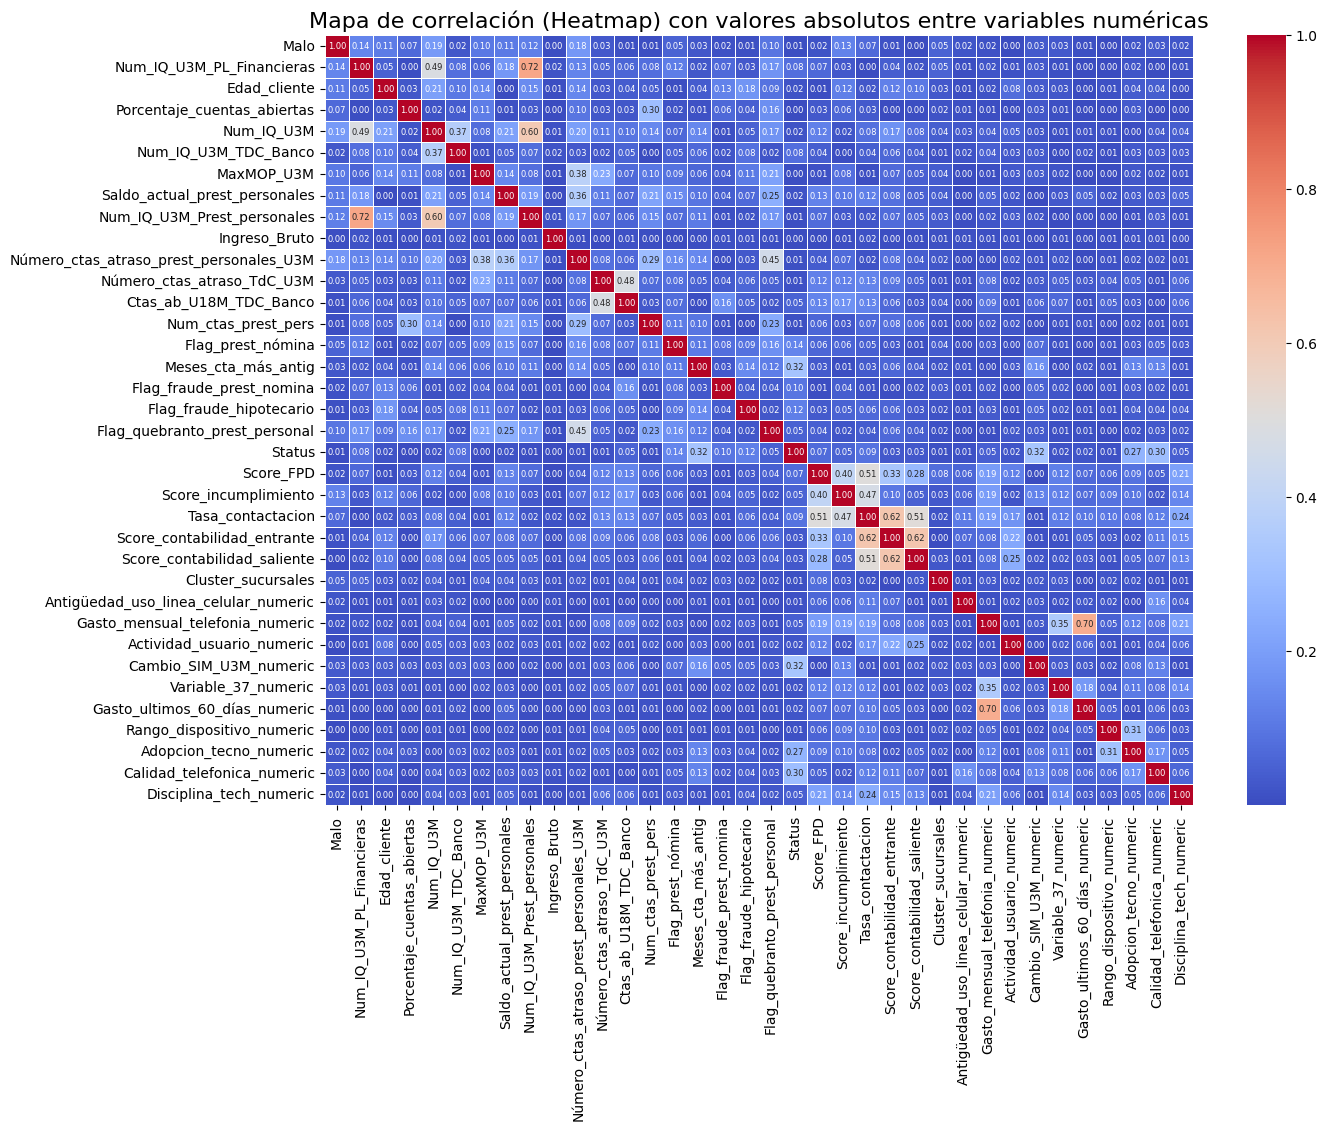

In [ ]:
import seaborn as sns

# Excluir las variables que no queremos en la matriz de correlación
excluded_vars = ['Aprobado', 'Hit_Buro_Huella', 'Hit_Buro_Huella_agrupado_numeric']

# Filtrar las variables numéricas excluyendo las no deseadas
df_numeric_filtered = df_grupo_11_aprobado.drop(columns=excluded_vars).select_dtypes(include=[np.number])

# Calcular la matriz de correlación con valores absolutos
correlation_matrix = df_numeric_filtered.corr().abs()

# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 10))

# Generar el heatmap con valores de correlación absoluta
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"size": 6})

# Configurar el título
plt.title("Mapa de correlación (Heatmap) con valores absolutos entre variables numéricas", size=16)

# Mostrar el gráfico
plt.show()


In [ ]:
# Excluir las variables que no queremos en la matriz de correlación
excluded_vars = ['Aprobado', 'Hit_Buro_Huella', 'Hit_Buro_Huella_agrupado_numeric']

# Filtrar las variables numéricas excluyendo las no deseadas
df_numeric_filtered = df_grupo_11_aprobado.drop(columns=excluded_vars).select_dtypes(include=[np.number])

# Calcular la matriz de correlación con valores absolutos
correlation_matrix = df_numeric_filtered.corr().abs()

# Identificar las correlaciones mayores a 0.6 (excluyendo la diagonal con correlaciones de 1)
high_correlation_pairs = correlation_matrix[(correlation_matrix > 0.6) & (correlation_matrix < 1)]

# Convertir a lista de pares correlacionados
correlated_vars = high_correlation_pairs.stack().reset_index()
correlated_vars.columns = ['Variable_1', 'Variable_2', 'Correlation']

# Mostrar solo los pares únicos
unique_correlated_vars = correlated_vars[correlated_vars['Variable_1'] < correlated_vars['Variable_2']].copy()

# Función para obtener IV y KS de una variable en el resumen
def get_iv_ks(var, summary_results):
    for result in summary_results:
        if result['Variable'] == var:
            return result['IV'], result['KS']
    return None, None

# Agregar las columnas de IV y KS a la tabla de correlaciones usando .loc
unique_correlated_vars.loc[:, 'IV_Variable_1'], unique_correlated_vars.loc[:, 'KS_Variable_1'] = zip(*unique_correlated_vars['Variable_1'].apply(lambda x: get_iv_ks(x, summary_results)))
unique_correlated_vars.loc[:, 'IV_Variable_2'], unique_correlated_vars.loc[:, 'KS_Variable_2'] = zip(*unique_correlated_vars['Variable_2'].apply(lambda x: get_iv_ks(x, summary_results)))

# Mostrar la tabla de correlaciones con IV y KS
print("\nVariables correlacionadas con su IV y KS correspondientes:")
print(unique_correlated_vars)



Variables correlacionadas con su IV y KS correspondientes:
                        Variable_1                     Variable_2  \
0        Num_IQ_U3M_PL_Financieras    Num_IQ_U3M_Prest_personales   
1                       Num_IQ_U3M    Num_IQ_U3M_Prest_personales   
5      Score_contabilidad_entrante              Tasa_contactacion   
6      Score_contabilidad_entrante    Score_contabilidad_saliente   
8  Gasto_mensual_telefonia_numeric  Gasto_ultimos_60_días_numeric   

   Correlation  IV_Variable_1  KS_Variable_1  IV_Variable_2  KS_Variable_2  
0     0.717521       0.047092       0.060112       0.101337       0.142411  
1     0.602396       0.220350       0.198966       0.101337       0.142411  
5     0.617565       0.039589       0.048307       0.013155       0.040039  
6     0.617561       0.039589       0.048307       0.013018       0.048224  
8     0.696601            NaN            NaN            NaN            NaN  


In [ ]:
# Vamos a seleccionar las variables correlacionadas con >= 0.6, pero quedándonos con las que tienen mejor IV y KS

# Para cada par de variables correlacionadas, seleccionamos la que tenga el mejor IV y KS
def select_best_variable(row):
    if row['IV_Variable_1'] > row['IV_Variable_2']:
        return row['Variable_1'], row['IV_Variable_1'], row['KS_Variable_1']
    elif row['IV_Variable_1'] < row['IV_Variable_2']:
        return row['Variable_2'], row['IV_Variable_2'], row['KS_Variable_2']
    else:
        # Si tienen el mismo IV, nos quedamos con la que tenga mejor KS
        if row['KS_Variable_1'] > row['KS_Variable_2']:
            return row['Variable_1'], row['IV_Variable_1'], row['KS_Variable_1']
        else:
            return row['Variable_2'], row['IV_Variable_2'], row['KS_Variable_2']

# Aplicamos la función para obtener las mejores variables por cada par
best_vars = unique_correlated_vars.apply(select_best_variable, axis=1, result_type='expand')
best_vars.columns = ['Best_Variable', 'Best_IV', 'Best_KS']

# Eliminamos duplicados, ya que una variable podría estar presente en varios pares
best_vars_final = best_vars.drop_duplicates(subset=['Best_Variable'])

# Mostrar la tabla final con las mejores variables
print("\nTabla final con las mejores variables, seleccionadas por IV y KS:")
print(best_vars_final)


Tabla final con las mejores variables, seleccionadas por IV y KS:
                   Best_Variable   Best_IV   Best_KS
0    Num_IQ_U3M_Prest_personales  0.101337  0.142411
1                     Num_IQ_U3M  0.220350  0.198966
5    Score_contabilidad_entrante  0.039589  0.048307
8  Gasto_ultimos_60_días_numeric       NaN       NaN


In [ ]:
# Vamos a generar el DataFrame final eliminando las variables correlacionadas >= 0.6 y conservando solo las mejores

# Crear una lista con las mejores variables seleccionadas del ejercicio anterior
best_variables = best_vars_final['Best_Variable'].tolist()

# Crear una lista de todas las variables correlacionadas, para eliminarlas del DataFrame final
correlated_variables = set(unique_correlated_vars['Variable_1']).union(set(unique_correlated_vars['Variable_2']))

# Filtrar las variables que no son correlacionadas o que están en la lista de mejores variables
final_variables = [var for var in df_grupo_11_aprobado.columns if var in best_variables or var not in correlated_variables]

# Crear el DataFrame final con las variables seleccionadas
df_final = df_grupo_11_aprobado[final_variables].copy()

# Generar una tabla de estadísticos descriptivos para todas las variables, incluyendo variables str
# Para las variables str, usaremos el método describe(include='all')
descriptive_stats = df_final.describe(include='all')

# Mostrar la tabla de estadísticos descriptivos
print("\nTabla de estadísticos descriptivos para todas las variables del DataFrame final:")
print(descriptive_stats)


Tabla de estadísticos descriptivos para todas las variables del DataFrame final:
        Aprobado  Hit_Buro_Huella          Malo  Edad_cliente  \
count    12719.0          12719.0  12719.000000  12719.000000   
unique       NaN              NaN           NaN           NaN   
top          NaN              NaN           NaN           NaN   
freq         NaN              NaN           NaN           NaN   
mean         1.0             11.0      0.170925     62.443352   
std          0.0              0.0      0.376459      8.139678   
min          1.0             11.0      0.000000     25.000000   
25%          1.0             11.0      0.000000     59.000000   
50%          1.0             11.0      0.000000     62.000000   
75%          1.0             11.0      0.000000     67.000000   
max          1.0             11.0      1.000000     83.000000   

        Porcentaje_cuentas_abiertas    Num_IQ_U3M  Num_IQ_U3M_TDC_Banco  \
count                  12719.000000  12719.000000          127

Precisión del modelo en test: 61.92%

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.61      0.73      2636
           1       0.26      0.64      0.37       544

    accuracy                           0.62      3180
   macro avg       0.57      0.63      0.55      3180
weighted avg       0.78      0.62      0.67      3180



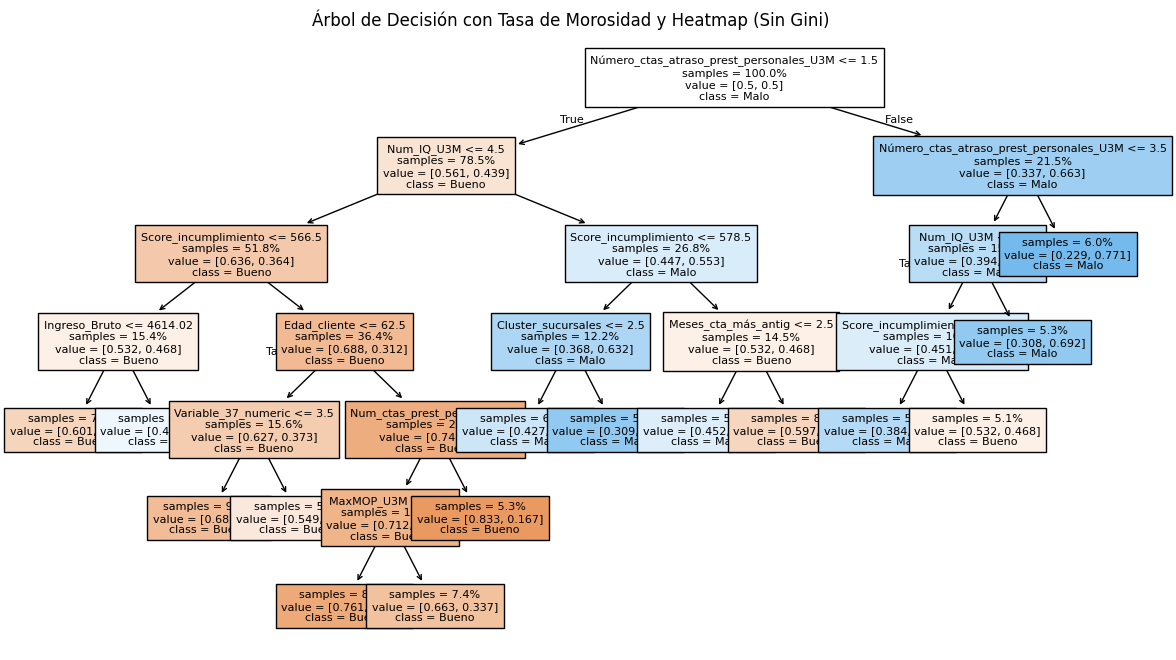

In [ ]:
# Importar las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree

# Convertir las variables categóricas en variables dummy (One-Hot Encoding)
df_final_encoded = pd.get_dummies(df_final, drop_first=True)

# Separar las variables independientes (X) y la variable objetivo (y)
X = df_final_encoded.drop(columns=['Malo'])  # La variable objetivo es 'Malo'
y = df_final_encoded['Malo']

# Dividir los datos en conjunto de entrenamiento (75%) y prueba (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Crear el árbol de decisión con manejo de clases desbalanceadas y restricciones
decision_tree = DecisionTreeClassifier(
    min_samples_leaf=max(int(0.05 * len(X_train)), 50),  # Mínimo 5% de las observaciones o 50
    class_weight='balanced',  # Manejo de clases desbalanceadas
    random_state=123
)

# Entrenar el modelo en el conjunto de entrenamiento
decision_tree.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred = decision_tree.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred, zero_division=1)  # Ajuste de zero_division para evitar warnings

# Mostrar la precisión y el reporte
print(f"Precisión del modelo en test: {accuracy * 100:.2f}%")
print("\nReporte de Clasificación:")
print(report)

# Obtener los nodos terminales del árbol
leaf_indices = decision_tree.apply(X_train)
unique_leaf_nodes = np.unique(leaf_indices)

# Calcular la tasa de morosidad para cada nodo terminal
leaf_morosidad = {}
for leaf in unique_leaf_nodes:
    node_indices = np.where(leaf_indices == leaf)[0]
    malos = np.sum(y_train.iloc[node_indices] == 1)
    total = len(node_indices)
    tasa_morosidad = malos / total
    leaf_morosidad[leaf] = tasa_morosidad

# Crear colores para las hojas finales basado en la tasa de morosidad
cmap = plt.get_cmap('RdYlGn_r')  # Mapa de color: rojo para alta morosidad, verde para baja
colors = [cmap(leaf_morosidad[leaf]) for leaf in unique_leaf_nodes]

# Visualización del árbol de decisión con la tasa de morosidad en las hojas excluyendo Gini
plt.figure(figsize=(14, 8))  # Ajustar el tamaño del gráfico

# Crear el árbol de decisión, sin Gini y con el color basado en la morosidad
tree_plot = tree.plot_tree(
    decision_tree,
    feature_names=X.columns,
    class_names=['Bueno', 'Malo'],
    filled=True,
    fontsize=8,  # Tamaño de letra ajustado
    proportion=True,  # Proporcionalidad en la visualización de nodos
    impurity=False  # Eliminar la información de Gini
)

# Personalizar las coordenadas para evitar encimamientos
for node_id, node in enumerate(decision_tree.tree_.__getstate__()['nodes']):
    if node['left_child'] == tree._tree.TREE_LEAF:  # Verificar si es hoja final
        x = (tree_plot[node_id].xy[0] - 0.01)  # Ajuste para el posicionamiento horizontal
        y = (tree_plot[node_id].xy[1] - 0.02)  # Ajuste para el posicionamiento vertical
        plt.text(x, y, f"Tasa de Morosidad: {leaf_morosidad[node_id]:.2f}", fontsize=8, ha='center')

# Título del gráfico
plt.title("Árbol de Decisión con Tasa de Morosidad y Heatmap (Sin Gini)")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Convertir las variables categóricas en variables dummy (One-Hot Encoding)
df_final_encoded = pd.get_dummies(df_final, drop_first=True)

# Separar las variables independientes (X) y la variable objetivo (y)
X = df_final_encoded.drop(columns=['Malo'])  # La variable objetivo es 'Malo'
y = df_final_encoded['Malo']

# Dividir los datos en conjunto de entrenamiento (75%) y prueba (25%) con la semilla fija
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Definir el valor mínimo de la hoja como el entero del 5% de la población de entrenamiento
min_samples_leaf = int(0.05 * len(X_train))

# Definir el clasificador de árbol de decisión con la semilla fija
decision_tree = DecisionTreeClassifier(random_state=123)

# Definir los hiperparámetros para la búsqueda
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],  # Profundidades a probar
    'min_samples_leaf': [min_samples_leaf],  # Valor mínimo fijo de la hoja
    'criterion': ['gini', 'entropy'],  # Criterio de evaluación
    'class_weight': [None, 'balanced'],  # Manejo de clases desbalanceadas
}

# Definir la búsqueda en cuadrícula (GridSearchCV) con validación cruzada
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los resultados en un DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Seleccionar las columnas relevantes para el resumen
results_summary = results[['param_max_depth', 'param_min_samples_leaf', 'param_criterion', 'param_class_weight', 'mean_test_score']]

# Ordenar por la métrica de precisión en el conjunto de prueba
results_summary = results_summary.sort_values(by='mean_test_score', ascending=False)

# Mostrar la tabla resumen con las combinaciones de hiperparámetros y el accuracy
print("\nTabla resumen de combinaciones de hiperparámetros y accuracy en Cross Validation:")
print(results_summary)


Tabla resumen de combinaciones de hiperparámetros y accuracy en Cross Validation:
    param_max_depth  param_min_samples_leaf param_criterion  \
0                 3                     476            gini   
9                 4                     476         entropy   
15               10                     476         entropy   
14                9                     476         entropy   
13                8                     476         entropy   
12                7                     476         entropy   
11                6                     476         entropy   
10                5                     476         entropy   
8                 3                     476         entropy   
7                10                     476            gini   
6                 9                     476            gini   
5                 8                     476            gini   
4                 7                     476            gini   
3                 6                

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Enfoque recomendado:

- Optimizar otras métricas: En lugar de optimizar solo el accuracy, deberíamos optimizar otras métricas que reflejen mejor el rendimiento en el caso de clases desbalanceadas, como recall o f1-score, que ayudan a capturar los morosos.

- Uso de class_weight='balanced': Asignar un peso mayor a la clase minoritaria ("malo") para ayudar al modelo a detectar mejor esta clase.

- Validación cruzada: Utilizar validación cruzada para asegurarnos de que el modelo generaliza bien y evitar el overfitting.

- Ajustar los hiperparámetros: Incluir profundidad del árbol, criterios de división y otros parámetros para encontrar el mejor ajuste

In [ ]:
# Importar las librerías necesarias
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, make_scorer, f1_score

# Convertir las variables categóricas en variables dummy (One-Hot Encoding)
df_final_encoded = pd.get_dummies(df_final, drop_first=True)

# Separar las variables independientes (X) y la variable objetivo (y)
X = df_final_encoded.drop(columns=['Malo'])  # La variable objetivo es 'Malo'
y = df_final_encoded['Malo']

# Dividir los datos en conjunto de entrenamiento (75%) y prueba (25%) con la semilla fija
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Definir el valor mínimo de la hoja como el entero del 5% de la población de entrenamiento
min_samples_leaf = int(0.05 * len(X_train))

# Definir el clasificador de árbol de decisión con la semilla fija
decision_tree = DecisionTreeClassifier(random_state=123)

# Definir los hiperparámetros para la búsqueda
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],  # Profundidades a probar
    'min_samples_leaf': [min_samples_leaf],  # Valor mínimo fijo de la hoja
    'criterion': ['gini', 'entropy'],  # Criterio de evaluación
    'class_weight': ['balanced'],  # Manejo de clases desbalanceadas
}

# Definir el scorer basado en f1-score o recall
scorer = make_scorer(f1_score, pos_label=1)  # Optimizar el F1-Score de la clase "malo"

# Definir la búsqueda en cuadrícula (GridSearchCV) con validación cruzada
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring=scorer, return_train_score=True)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los resultados en un DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Seleccionar las columnas relevantes para el resumen
results_summary = results[['param_max_depth', 'param_min_samples_leaf', 'param_criterion', 'param_class_weight', 'mean_test_score']]

# Ordenar por la métrica de precisión en el conjunto de prueba
results_summary = results_summary.sort_values(by='mean_test_score', ascending=False)

# Mostrar la tabla resumen con las combinaciones de hiperparámetros y el f1-score
print("\nTabla resumen de combinaciones de hiperparámetros y f1-score en Cross Validation:")
print(results_summary)



Tabla resumen de combinaciones de hiperparámetros y f1-score en Cross Validation:
    param_max_depth  param_min_samples_leaf param_criterion  \
2                 5                     476            gini   
3                 6                     476            gini   
4                 7                     476            gini   
5                 8                     476            gini   
6                 9                     476            gini   
7                10                     476            gini   
10                5                     476         entropy   
11                6                     476         entropy   
12                7                     476         entropy   
13                8                     476         entropy   
14                9                     476         entropy   
15               10                     476         entropy   
1                 4                     476            gini   
9                 4                

Con base en los resultados generados, el mean_test_score para todas las profundidades del árbol se mantiene en un rango similar (~0.36).

Esto sugiere que el modelo con árboles de decisión, incluso al ajustar la profundidad, no está logrando capturar bien la variabilidad del problema, especialmente cuando se trata de un problema de clases desbalanceadas con una tasa de morosidad del 18%.

Recomendaciones:
- Limitación de los árboles de decisión en problemas desbalanceados: El árbol de decisión, incluso ajustando la profundidad y usando class_weight='balanced', parece tener limitaciones para mejorar el rendimiento. Esto puede ser debido a que, en problemas desbalanceados, los árboles de decisión tienden a no separar bien las clases minoritarias (en este caso, los "malos").

- Prueba con algoritmos más robustos:

  a) Random Forest: Los bosques aleatorios combinan múltiples árboles de decisión y son más robustos para evitar overfitting y mejorar la generalización.

  b) Gradient Boosting: Otro enfoque sería probar modelos de boosting, como XGBoost o LightGBM, que pueden manejar mejor las clases desbalanceadas y suelen rendir mejor en escenarios donde las clases minoritarias son críticas.
  
  c) Ajustar los umbrales de decisión: Si decides seguir usando árboles de decisión o Random Forest, puedes ajustar el umbral de clasificación para dar más importancia a la clase minoritaria.

**Más énfasis en el recall o f1-score: Dado que la tasa de morosidad es del 18%, es importante enfocarse en maximizar el recall o el f1-score, en lugar del accuracy. Esto asegurará que el modelo capture bien los morosos, incluso si hay un sacrificio en la precisión general.

In [ ]:
# Convertir las variables categóricas en variables dummy (One-Hot Encoding)
df_final_encoded = pd.get_dummies(df_final, drop_first=True)

# Separar las variables independientes (X) y la variable objetivo (y)
X = df_final_encoded.drop(columns=['Malo'])  # La variable objetivo es 'Malo'
y = df_final_encoded['Malo']

# Dividir los datos en conjunto de entrenamiento (75%) y prueba (25%) con la semilla fija
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Definir el valor mínimo de la hoja como el entero del 5% de la población de entrenamiento
min_samples_leaf = int(0.05 * len(X_train))

# Definir el clasificador Random Forest con la semilla fija
random_forest = RandomForestClassifier(random_state=123, class_weight='balanced')

# Definir los hiperparámetros para la búsqueda
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [4, 6, 8, 10],  # Profundidades a probar
    'min_samples_leaf': [min_samples_leaf],  # Valor mínimo fijo de la hoja
    'criterion': ['gini'],  # Criterio de evaluación
}

# Definir el scorer basado en f1-score o recall para maximizar el poder de discriminación
scorer = make_scorer(f1_score, pos_label=1)

# Definir la búsqueda en cuadrícula (GridSearchCV) con validación cruzada
grid_search_rf = GridSearchCV(random_forest, param_grid, cv=5, scoring=scorer, return_train_score=True)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search_rf.fit(X_train, y_train)

# Obtener los resultados en un DataFrame
results_rf = pd.DataFrame(grid_search_rf.cv_results_)

# Seleccionar las columnas relevantes para el resumen
results_summary_rf = results_rf[['param_n_estimators', 'param_max_depth', 'param_min_samples_leaf', 'param_criterion', 'mean_test_score']]

# Ordenar por la métrica de precisión en el conjunto de prueba
results_summary_rf = results_summary_rf.sort_values(by='mean_test_score', ascending=False)

# Mostrar la tabla resumen con las combinaciones de hiperparámetros y el f1-score
print("\nTabla resumen de combinaciones de hiperparámetros y f1-score en Cross Validation con Random Forest:")
print(results_summary_rf)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Tabla resumen de combinaciones de hiperparámetros y f1-score en Cross Validation con Random Forest:
    param_n_estimators  param_max_depth  param_min_samples_leaf  \
8                  200                8                     476   
11                 200               10                     476   
5                  200                6                     476   
2                  200                4                     476   
1                  100                4                     476   
7                  100                8                     476   
10                 100               10                     476   
6                   50                8                     476   
9                   50               10                     476   
3                   50                6                     476   
4                  100                6                     476   
0                   50                4                     476   

   param_criterion  mean_te

Con base en los resultados de la optimización de los hiperparámetros para Random Forest, se observan algunas conclusiones clave:

Mejores Hiperparámetros:

**El mejor conjunto de hiperparámetros es:**

n_estimators = 200

max_depth = 8

min_samples_leaf = 476 (5% de la población de entrenamiento)

criterion = 'gini'

Este conjunto de hiperparámetros logró un f1-score de aproximadamente 0.3815 en cross-validation, el cual es el más alto entre todas las combinaciones probadas.

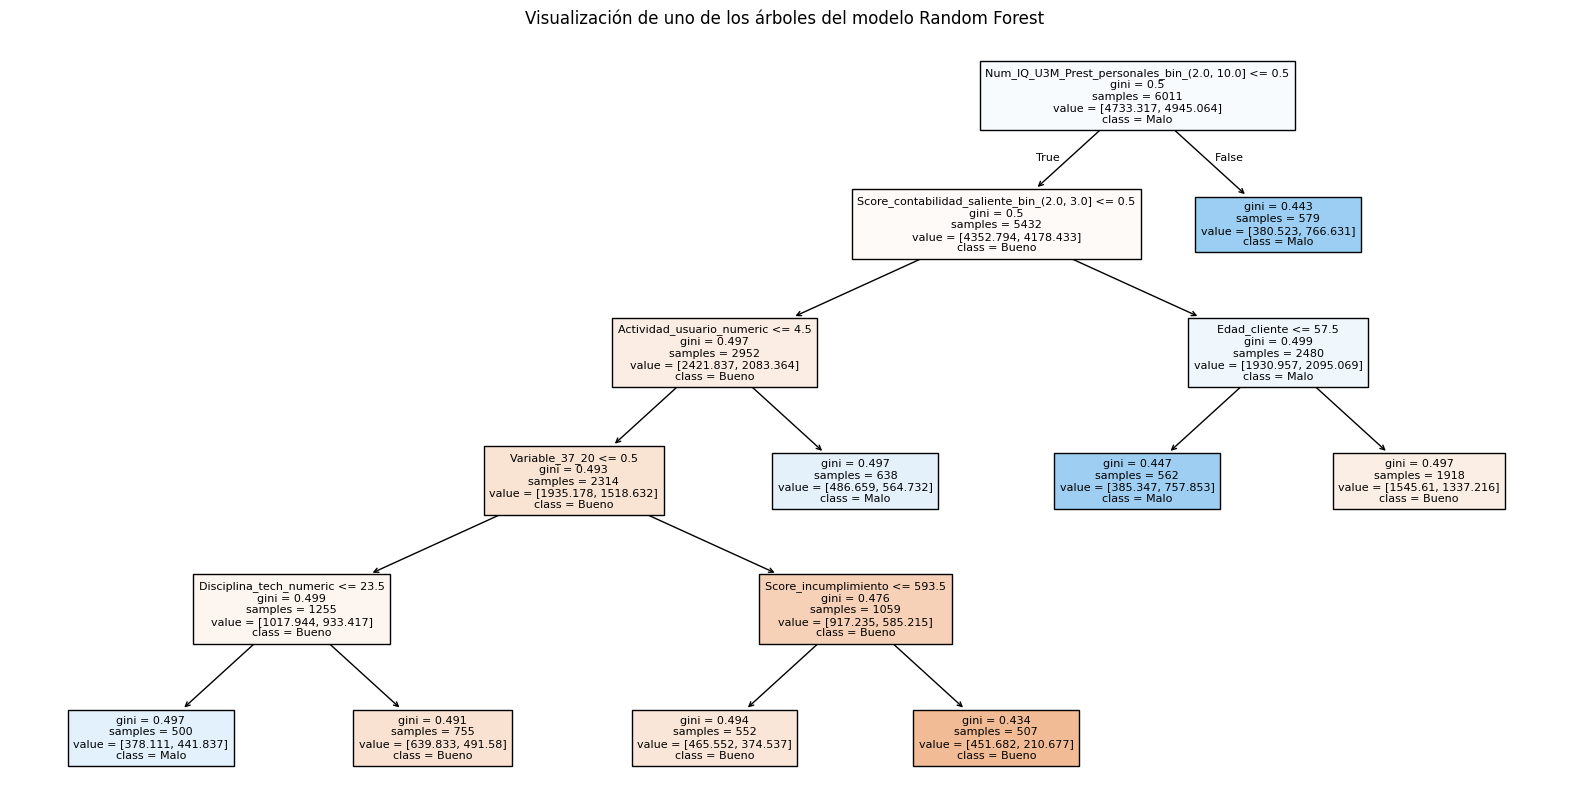

In [ ]:
# Entrenar el modelo Random Forest con los mejores hiperparámetros
best_rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_leaf=476,
    criterion='gini',
    class_weight='balanced',
    random_state=123
)

# Entrenar el modelo en los datos de entrenamiento
best_rf_model.fit(X_train, y_train)

# Graficar uno de los árboles del Random Forest (para visualizarlo)
plt.figure(figsize=(20, 10))
tree.plot_tree(best_rf_model.estimators_[0], filled=True, feature_names=X.columns, class_names=['Bueno', 'Malo'], fontsize=8)
plt.title("Visualización de uno de los árboles del modelo Random Forest")
plt.show()

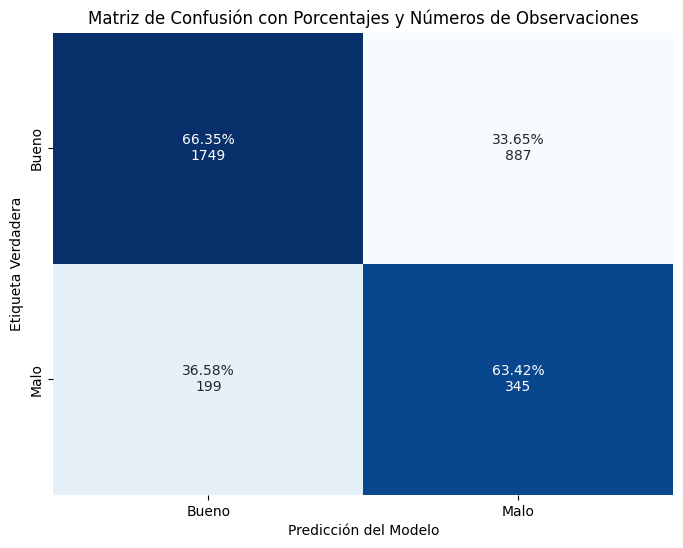

El accuracy del modelo Random Forest en el conjunto de prueba es: 65.85%


In [ ]:
# Importar las librerías necesarias para generar la matriz de confusión
from sklearn.metrics import confusion_matrix

# Hacer predicciones con el modelo Random Forest entrenado
y_pred = best_rf_model.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcular los porcentajes por fila (normalizar por fila)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Crear un DataFrame con la matriz de confusión, incluyendo tanto los porcentajes como el número de observaciones
cm_with_counts = np.empty_like(cm, dtype=object)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        cm_with_counts[i, j] = f"{cm_percentage[i, j]:.2%}\n{cm[i, j]}"

# Graficar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=cm_with_counts, fmt='', cmap='Blues', cbar=False, xticklabels=['Bueno', 'Malo'], yticklabels=['Bueno', 'Malo'])
plt.title("Matriz de Confusión con Porcentajes y Números de Observaciones")
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Predicción del Modelo')
plt.show()

# Calcular el accuracy del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)

# Mostrar el resultado
print(f"El accuracy del modelo Random Forest en el conjunto de prueba es: {accuracy * 100:.2f}%")

In [ ]:
# Importar las librerías necesarias para la regresión logística y el escalado
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Escalar los datos para ayudar con la convergencia
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo de regresión logística con un mayor número de iteraciones
logistic_regression = LogisticRegression(random_state=123, class_weight='balanced', max_iter=10000, solver='lbfgs')

# Entrenar el modelo de regresión logística con los datos de entrenamiento escalados
logistic_regression.fit(X_train_scaled, y_train)

# Hacer predicciones con el modelo en los datos de prueba escalados
y_pred_logistic = logistic_regression.predict(X_test_scaled)

# Calcular el accuracy del modelo de regresión logística
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Mostrar el resultado del accuracy
print(f"El accuracy del modelo de Regresión Logística en el conjunto de prueba es: {accuracy_logistic * 100:.2f}%")


El accuracy del modelo de Regresión Logística en el conjunto de prueba es: 69.78%


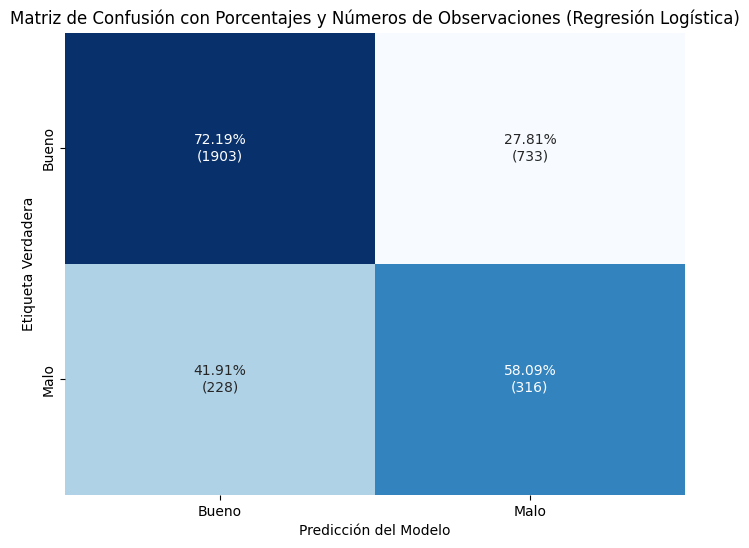

In [ ]:
# Importar las librerías necesarias para graficar la matriz de confusión
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generar la matriz de confusión con los datos de prueba
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Calcular los porcentajes por fila (normalizar por fila)
cm_percentage = cm_logistic.astype('float') / cm_logistic.sum(axis=1)[:, np.newaxis]

# Crear un DataFrame con la matriz de confusión, incluyendo tanto los porcentajes como el número de observaciones
cm_with_counts = np.empty_like(cm_logistic, dtype=object)
for i in range(cm_logistic.shape[0]):
    for j in range(cm_logistic.shape[1]):
        cm_with_counts[i, j] = f"{cm_percentage[i, j]:.2%}\n({cm_logistic[i, j]})"

# Graficar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=cm_with_counts, fmt='', cmap='Blues', cbar=False, xticklabels=['Bueno', 'Malo'], yticklabels=['Bueno', 'Malo'])
plt.title("Matriz de Confusión con Porcentajes y Números de Observaciones (Regresión Logística)")
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Predicción del Modelo')
plt.show()



In [ ]:
# Definir una función para verificar si la diagonal principal cumple con el criterio >= 60%
def check_diagonal_60(cm):
    bueno_bueno = cm[0, 0] / cm[0].sum()  # Bueno (Verdadero) y Bueno (Predicho)
    malo_malo = cm[1, 1] / cm[1].sum()    # Malo (Verdadero) y Malo (Predicho)
    return bueno_bueno >= 0.60 and malo_malo >= 0.60

# Definir el modelo de regresión logística
logistic_regression = LogisticRegression(random_state=123, class_weight='balanced', max_iter=5000)

# Definir los hiperparámetros para la búsqueda
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Controla la regularización
    'solver': ['lbfgs', 'liblinear'],  # Solvers a probar
}

# Definir la búsqueda en cuadrícula con validación cruzada
grid_search_logistic = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search_logistic.fit(X_train_scaled, y_train)

# Obtener el mejor modelo encontrado
best_logistic_model = grid_search_logistic.best_estimator_

# Probar diferentes umbrales de decisión para encontrar uno que satisfaga el criterio >=60%
optimal_threshold = 0.5
for threshold in np.arange(0.3, 0.7, 0.01):  # Probar desde 0.3 a 0.7 con saltos de 0.01
    # Hacer predicciones probabilísticas
    y_pred_proba = best_logistic_model.predict_proba(X_test_scaled)[:, 1]
    # Ajustar el umbral de decisión
    y_pred_logistic_tuned = np.where(y_pred_proba >= threshold, 1, 0)

    # Generar la matriz de confusión
    cm_logistic_tuned = confusion_matrix(y_test, y_pred_logistic_tuned)

    # Verificar si la diagonal principal cumple con el criterio >=60%
    if check_diagonal_60(cm_logistic_tuned):
        optimal_threshold = threshold
        break

# Calcular la matriz de confusión final con el umbral óptimo
y_pred_final = np.where(y_pred_proba >= optimal_threshold, 1, 0)
cm_final = confusion_matrix(y_test, y_pred_final)

# Calcular los porcentajes por fila (normalizar por fila)
cm_percentage_final = cm_final.astype('float') / cm_final.sum(axis=1)[:, np.newaxis]

# Crear un DataFrame con la matriz de confusión final
cm_with_counts_final = pd.DataFrame(index=['Bueno (Verdadero)', 'Malo (Verdadero)'],
                                    columns=['Bueno (Predicho)', 'Malo (Predicho)'])

# Rellenar la matriz con porcentajes y números de observaciones
for i in range(cm_final.shape[0]):
    for j in range(cm_final.shape[1]):
        cm_with_counts_final.iloc[i, j] = f"{cm_percentage_final[i, j]:.2%} ({cm_final[i, j]})"

# Mostrar la matriz de confusión final
print("\nMatriz de Confusión final ajustada con umbral óptimo:")
print(cm_with_counts_final)

# Mostrar el umbral óptimo encontrado y los mejores hiperparámetros
print(f"\nUmbral óptimo encontrado: {optimal_threshold}")
print(f"Mejores hiperparámetros encontrados: {grid_search_logistic.best_params_}")


Matriz de Confusión final ajustada con umbral óptimo:
                  Bueno (Predicho) Malo (Predicho)
Bueno (Verdadero)    61.00% (1608)   39.00% (1028)
Malo (Verdadero)      31.07% (169)    68.93% (375)

Umbral óptimo encontrado: 0.4100000000000001
Mejores hiperparámetros encontrados: {'C': 0.01, 'solver': 'lbfgs'}


In [ ]:
import scipy.stats as stats

# Obtener los coeficientes del modelo de regresión logística ajustado
params = best_logistic_model.coef_[0]
intercept = best_logistic_model.intercept_[0]

# Calcular el error estándar aproximado de los coeficientes (usando varianza estimada)
n = X_train_scaled.shape[0]  # Número de observaciones
p = X_train_scaled.shape[1]  # Número de predictores

# Calcular el error estándar aproximado
stderr_approx = np.sqrt(np.sum(np.power(X_train_scaled, 2), axis=0) / (n - p))

# Calcular los intervalos de confianza al 95%
z_score = stats.norm.ppf(0.975)  # Z para 95% de confianza
conf_intervals = np.vstack([params - z_score * stderr_approx, params + z_score * stderr_approx]).T

# Crear un DataFrame para mostrar los coeficientes, los intervalos de confianza y el intercepto
param_names = X_train.columns
results = pd.DataFrame({
    'Parámetro': param_names,
    'Coeficiente': params,
    'IC Inferior 95%': conf_intervals[:, 0],
    'IC Superior 95%': conf_intervals[:, 1]
})

# Incluir el intercepto en el listado
results.loc['Intercepto'] = ['Intercepto', intercept, intercept - z_score * stderr_approx[0], intercept + z_score * stderr_approx[0]]

# Mostrar los resultados
print("Listado de Coeficientes e Intervalos de Confianza al 95%:")
print(results)

Listado de Coeficientes e Intervalos de Confianza al 95%:
                               Parámetro  Coeficiente  IC Inferior 95%  \
0                               Aprobado     0.000000         0.000000   
1                        Hit_Buro_Huella     0.000000         0.000000   
2                           Edad_cliente    -0.162619        -2.209627   
3            Porcentaje_cuentas_abiertas     0.129973        -1.917035   
4                             Num_IQ_U3M     0.225723        -1.821285   
...                                  ...          ...              ...   
790           Entidad_federativa_bin_YUC    -0.005532        -2.052541   
791           Entidad_federativa_bin_ZAC     0.019508        -2.027500   
792         Tipo_suscripcion_bin_POSPAGO    -0.008936        -2.055945   
793         Tipo_suscripcion_bin_PREPAGO     0.086533        -1.960475   
Intercepto                    Intercepto    -0.451573        -0.451573   

            IC Superior 95%  
0                  0.00